## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [74]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 uszipcode==1.0.1 -q --user
# !pip install sqlalchemy_mate==1.4.28.4 SQLAlchemy==1.4.32 python-Levenshtein uszipcode==1.0.1

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

# import all of required libraries and dependecies setting in next code block

In [75]:
# Library to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation Libraries
import pandas as pd
import numpy as np

# Library to split data for testing and training model
from sklearn.model_selection import train_test_split

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display as many columns in data
pd.set_option("display.max_columns", None)
# Limit number of rows to be displayed to 100 to avoid long list
pd.set_option("display.max_rows", 100)

# Logistic Regression Library
from sklearn.linear_model import LogisticRegression

# Decision Tree Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import Grid Search Model for Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV

# import specific modules from sklearn metrics library
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    make_scorer,

)

# import the SearchEngine from uszipcode library
# Note - latest uszipcode==1.0.1 has incompatiblity with latest SQLAlchemy and sqlalchemy_mate
# You may need to install dependecies in this sequence to ensure uszipcode library works without error
# pip install sqlalchemy_mate==1.4.28.4
# pip install SQLAlchemy==1.4.32
# pip install uszipcode==1.0.1
# pip install python-Levenshtein

from uszipcode import SearchEngine


## Loading the dataset

In [76]:
# Load data file
data = pd.read_csv("Loan_Modelling.csv")
# Make a copy of the data to avoid any changes to the original data during manipulation
loan = data.copy()

## Data Overview

* Observations
* Sanity checks

In [77]:
# Display 10 random sample rows of the dataset
loan.sample(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
970    971   57          32      75    94928       2    3.7          1   
1417  1418   42          18      52    94061       2    2.5          1   
1328  1329   60          36     145    95616       4    6.9          1   
2375  2376   55          30      69    91007       4    1.3          3   
305    306   60          35      22    91207       1    1.3          1   
1988  1989   52          28      18    91301       1    0.3          1   
3242  3243   38          14      33    92096       1    2.0          2   
3605  3606   61          31     130    92333       2    2.6          3   
2804  2805   56          32      33    95014       3    1.5          1   
4399  4400   48          23      21    94904       1    0.1          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
970        236              0                   0           0       1   
1417         0              0                   0           0       0   
1328       380              1                   0           0       0   
2375         0              0                   1           1       1   
305        123              0                   0           0       1   
1988       120              0                   0           0       1   
3242         0              0                   0           0       1   
3605         0              1                   0           0       0   
2804         0              0                   0           0       0   
4399         0              0                   0           0       0   

      CreditCard  
970            0  
1417           0  
1328           1  
2375           1  
305            0  
1988           0  
3242           0  
3605           0  
2804           0  
4399           0

In [78]:
# Lets drop the ID Column from dataset, as it does not add specific predictibility value
loan.drop("ID", axis=1, inplace=True)
loan.sample(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
1631   61          36     153    91105       1    2.6          2         0   
3029   41          17     119    94960       2    6.1          1       263   
2462   52          28      23    95828       3    0.4          1         0   
3325   48          23      35    93302       2    1.3          1         0   
4325   59          35      52    95616       4    1.5          1         0   
3669   40          15      22    95616       2    1.4          2         0   
1887   31           7      81    95006       2    2.0          2         0   
3555   35           9      81    91107       1    2.7          2         0   
1573   44          20      69    92028       1    0.8          3       184   
4636   41          16      78    95616       4    0.4          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
1631              1                   1           1       0           1  
3029              0                   1           0       1           0  
2462              0                   0           0       1           0  
3325              0                   0           0       0           0  
4325              0                   0           0       1           1  
3669              0                   0           0       1           1  
1887              0                   0           1       1           1  
3555              0                   0           0       1           0  
1573              0                   0           1       1           1  
4636              0                   0           0       1           0

In [79]:
# print first and last 5 rows of the dataset.
print(loan.head())
print("-" * 75)
print(loan.tail())


   Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
---------------------------------------------------------------------------
      Age  Experience  Income  ZIPCode  Family 

In [80]:
# Check for null values
loan.isnull().sum()


Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [81]:
# Check for duplicate values
loan.duplicated().sum()

0

# Observation: 
 - No duplicate values found in the data set
 - No null values found in the data set

In [82]:
# check shape of the data set
print("Dataset shape: ", loan.shape)

Dataset shape:  (5000, 13)


In [83]:
# check variables datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [84]:
# Data Summary
loan.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

## Observations (in order of display):
Age - min Age is 23 , max is 67 , Average is 45 Years old - Data seems normal
Experience - min Experience is -3 years, looks odd
Income - min Income is USD 46k, max is USD 224K and average is USD 64K - Data Appears to be right skewed.
ZIPCode - Zip codes should be converted to City/State using uszip library to avoid treating it as plain number as its location.
Family - min Family size is 1, max is 4 and average is 2 - Data looks reasonable and normally distributed, we can use it as category.
CCAvg - min CCAvg is USD 0k, max is USD 1.9K and average is USD 10K - Data appears normal but right skewed.
Education -  Education is a categorical variable for 1 as Undergrad, 2 as Graduate and 3 as Professional
Mortgage - min Mortgage is USD 0, max is USD 635K and average is USD 0 - Data appears right skewed
Personal_Loan - Personal_Loan is a categorical variable where 1: customer accepted the personal loan offered in the last campaign and 0:customer didnot accept
Securities_Account - Securities_Account is a categorical variable where 1: customer has Securities_Account 0:customer does not have Securities_Account
CD_Account - CD_Account is a categorical variable where 1: customer has CD_Account 0:customer does not have CD_Account
Online - Online is a categorical variable where 1: customer uses online banking 0:customer does use online banking
CreditCard - CreditCard is a categorical variable where 1: customer use a credit card issued by any other Bank 0:customer does not use a credit card issued by any other Bank

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### ZIPCode coversion to City and State 

In [85]:
# Find City and State for each ZIP code
# Create the search engine fro uszipcode library
search = SearchEngine()

# Function to extract the city using zipcode value
def get_city(x):
    return search.by_zipcode(x).city

# Function to extract state using zipcode value
def get_state(x):
    return search.by_zipcode(x).state

In [86]:
# Now populate city and state for each record/zip code
city_list = []
state_list =[]

# Loop through 5000 records in data, to extract city/state and add value to corrosponding lists
for i in np.arange(0,5000):
    try:
        city = get_city(loan["ZIPCode"].iloc[i])
        city_list.append(city)
        state = get_state(loan["ZIPCode"].iloc[i])
        state_list.append(state)
    except:
        city_list.append(np.nan)
        state_list.append(np.nan)
    continue

In [87]:
# Add new columns, city and state from lists in the dataset
loan['City'] = city_list
loan['State'] = state_list
loan.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   
5   37          13      29    92121       4    0.4          2       155   
6   53          27      72    91711       2    1.5          2         0   
7   50          24      22    93943       1    0.3          3         0   
8   35          10      81    90089       3    0.6          2       104   
9   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   
5              0                   0           0       1           0   
6              0                   0           0       1           0   
7              0                   0           0       0           1   
8              0                   0           0       1           0   
9              1                   0           0       0           0   

            City State  
0       Pasadena    CA  
1    Los Angeles    CA  
2       Berkeley    CA  
3  San Francisco    CA  
4     Northridge    CA  
5      San Diego    CA  
6      Claremont    CA  
7       Monterey    CA  
8    Los Angeles    CA  
9           Ojai    CA

In [88]:
# Check if any values in City column is null
loan['City'].isnull().value_counts()

False    4966
True       34
Name: City, dtype: int64

In [89]:
# Check if any values in State column is null
loan['State'].isnull().value_counts()

False    4966
True       34
Name: State, dtype: int64

In [90]:
# Find out which zipcodes did not get city data from uszip library
zip_city_nan = loan[loan['City'].isnull()]
zip_city_nan['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

In [91]:
# Find out which zipcodes did not get state data from uszip library
zip_state_nan = loan[loan['State'].isnull()]
zip_state_nan['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

### Missing values for City and State is for same set of 4 zip codes, most likely uszip library is missing some newer zip codes due to stale data

In [92]:
# Google Search missing Zip codes to manually populate City/State Data, 96651 belongs to United States Armed Forces (Naval/Marine)
missing_zip_values = {'92717':'Irvine, CA',
             '96651':'Naval-Marine, AP',
             '92634':'Fullerton, CA',
             '93077':'Ventura, CA'
            }

# Function to fill the missing values into dataset
def fill_nan(data, indxs, value, column):
    for i in indxs:
        data[column].iloc[i]=value
        
# Loop through missing_zip_values to fill in the missing city and state values    
for i in missing_zip_values.keys():
    indxs = loan[loan['ZIPCode']==int(i)].index
    fill_nan(loan, indxs, missing_zip_values[str(i)].split(',')[0], 'City')
    fill_nan(loan, indxs, missing_zip_values[str(i)].split(',')[1], 'State')

# Check if City/State null values removed from dataset
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
State                 0
dtype: int64

In [93]:
# Strip any whitespaces from newly populated columns
loan['City']=loan['City'].str.strip()
loan['State']=loan['State'].str.strip()

# Show statistics of City/State
print(f'{loan['City'].value_counts()}')
print("-" * 40)
print(f'{loan['State'].value_counts()}')

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sausalito          1
Ladera Ranch       1
Sierra Madre       1
Tahoe City         1
Stinson Beach      1
Name: City, Length: 245, dtype: int64
----------------------------------------
CA    4994
AP       6
Name: State, dtype: int64


In [94]:
# Show number of data rows having negative value for Experience Column
print(f'There are total {len(loan[loan["Experience"] < 0])} rows with a negative value for Experience')
# Checking on experience < 0
loan[loan["Experience"] < 0]["Experience"].value_counts()

There are total 52 rows with a negative value for Experience


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [95]:
# negative values for Experience are likely input errors and we can simply remove -ve sigh from Data 
loan["Experience"].replace(-1, 1, inplace=True)
loan["Experience"].replace(-2, 2, inplace=True)
loan["Experience"].replace(-3, 3, inplace=True)

In [96]:
# Find out that no more -ve values exists for Experience Column
len(loan[loan["Experience"] < 0])

0

In [97]:
# Categorical variables should be converted to data type of categorical variables from numeric.
category_columns = [
    "ZIPCode",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    'City',
    'State'
]
loan[category_columns] = loan[category_columns].astype("category")

In [98]:
# Verify that data types changed properly
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  City                5000 non-null   category
 14  State               5000 non-null   category
dtypes: category(9), float64(1), int64(5)
m

### Univariate Analysis

In [99]:
# Define function to plot the boxplot and histogram for all numerical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots     
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="rainbow"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="darkviolet", linestyle="-"
    )  # Add median to the histogram
    
# Define function to create barplot labels
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # size of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

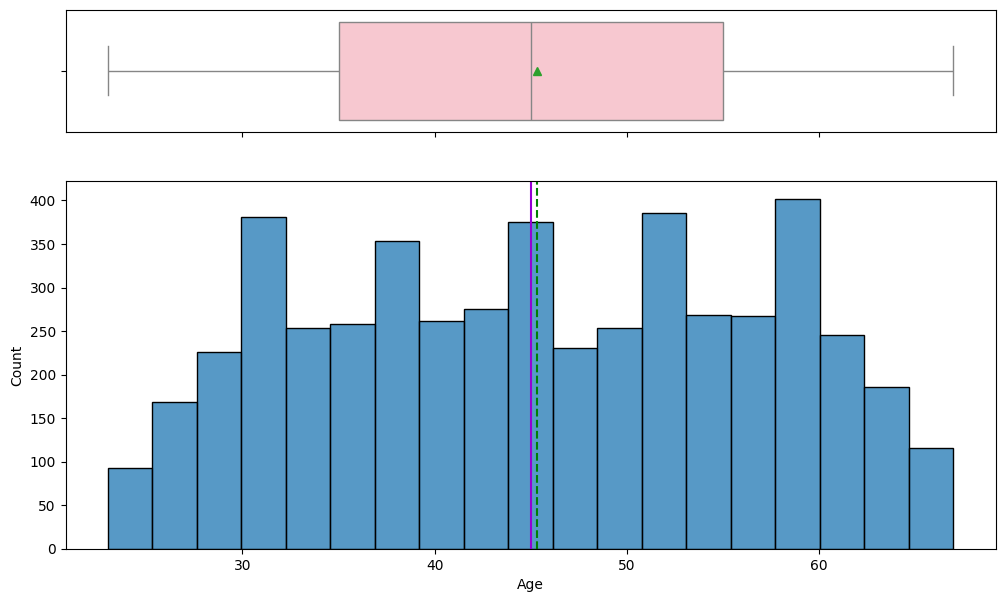

In [100]:
# Create Box Plot for Age
histogram_boxplot(loan,'Age')

* Average Age is around 45
* Several peaks observed as 30-33, 37-39, 44-46, 52-54 and 58-60
* Except for left and right ends data is fitting in uniform distribution


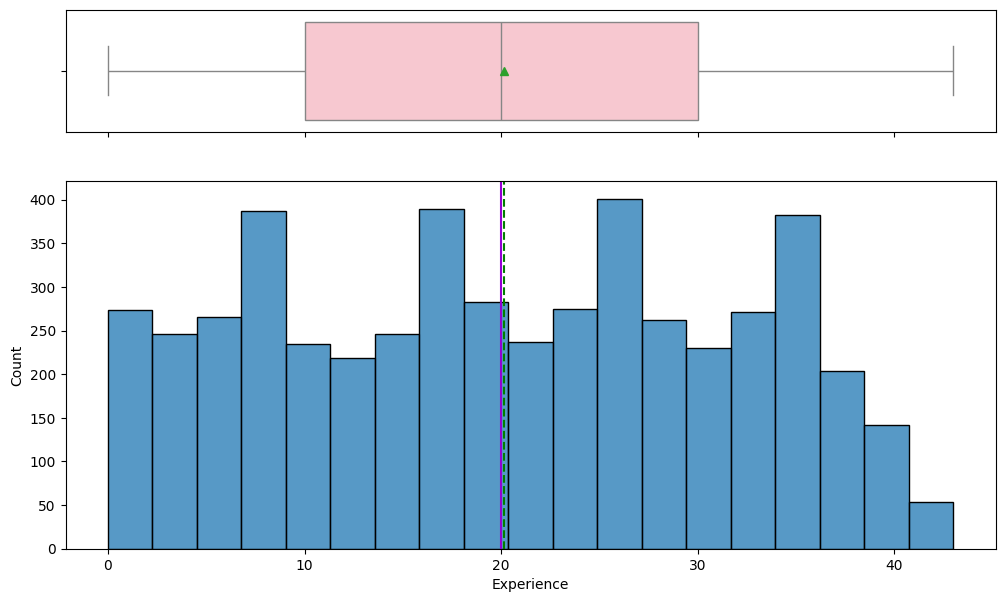

In [101]:

# Create Box Plot for Experiance
histogram_boxplot(loan,'Experience')

* Average Experiance is about 20 years
* Appears to be uniform distribution with few peaks

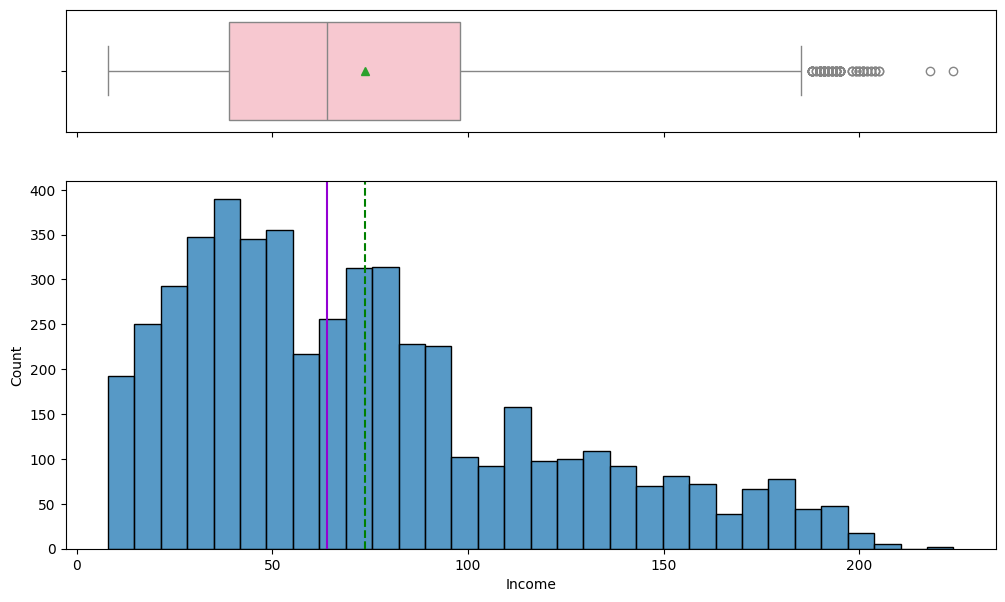

In [102]:
histogram_boxplot(loan, "Income")

* Average income is about 65K
* Median income is around 60K
* Dataset skewed to right 

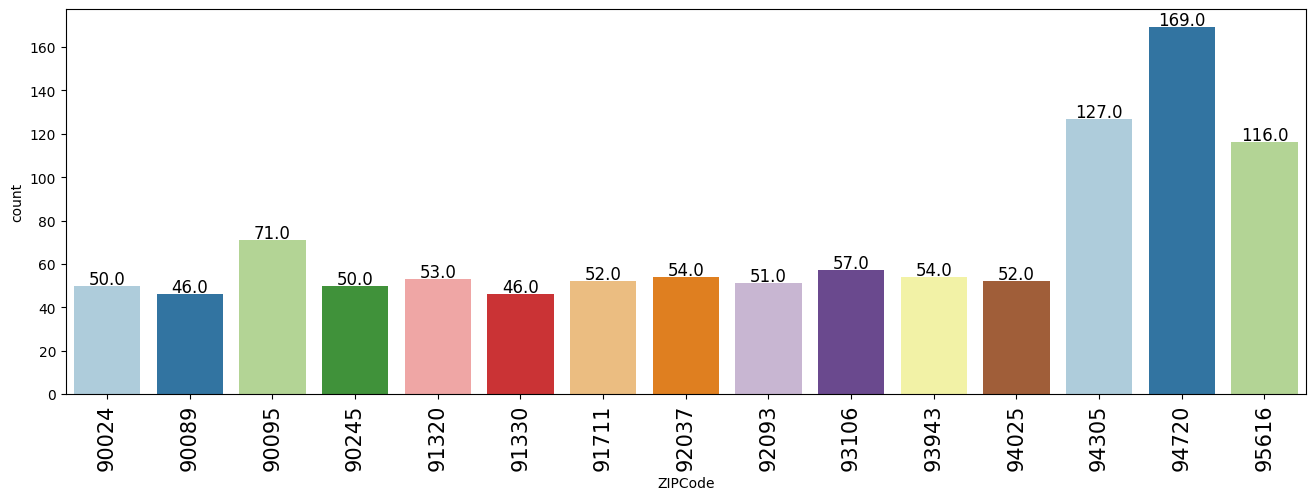

In [103]:
labeled_barplot(loan, "ZIPCode", n=15)

* Largest set of customers are from 3 zip codes 94305, 94720, 95616

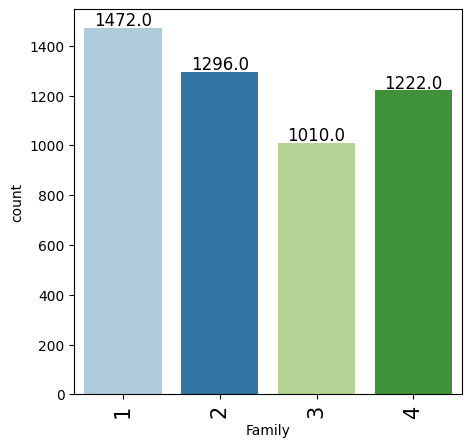

In [104]:
labeled_barplot(loan, "Family")

* Single Family is most common
* Order of Family size is 1, 2, 4, 3

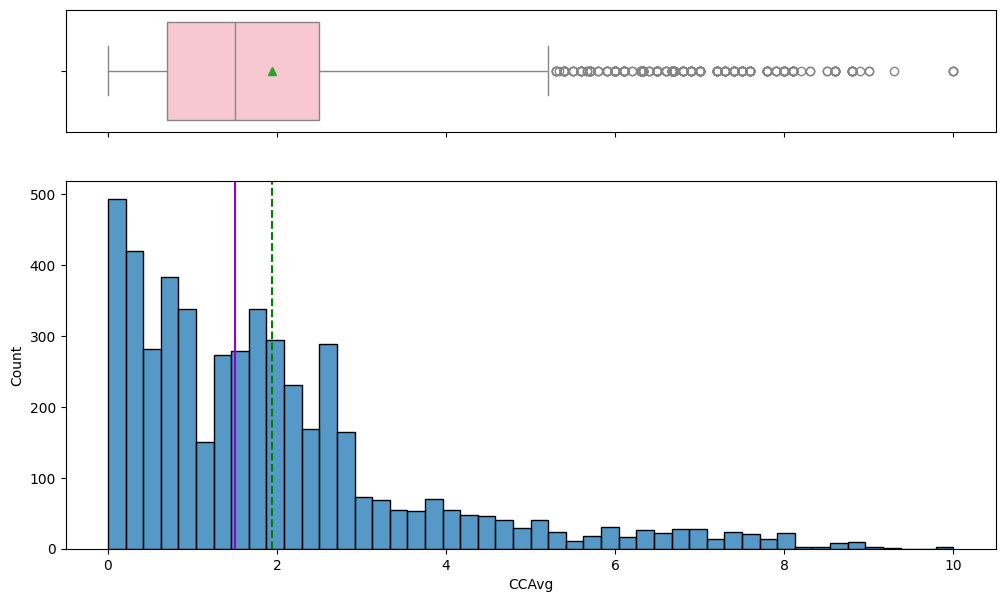

In [105]:
histogram_boxplot(loan,'CCAvg')

* Average customer spends arount $1.9K / month on Credit Card
* Dataset is right skewed with a number of outliers

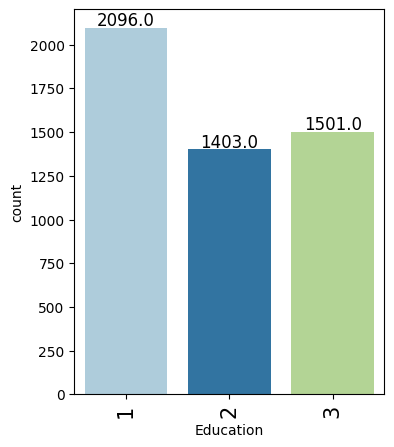

In [106]:
labeled_barplot(loan, "Education")

* Undergraduate Degree is most common
* graduate Degree is less prevalant than Professional Degree

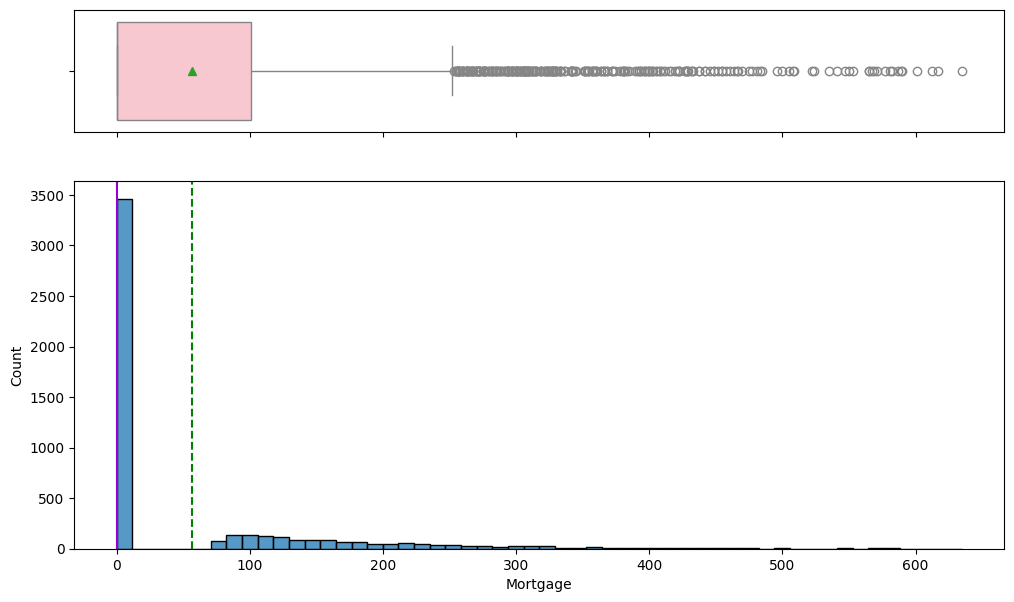

In [107]:
histogram_boxplot(loan, "Mortgage")

* Extreme Right Skewed Data Observed
* Need to seperate non-zero value mortgage to visulize better

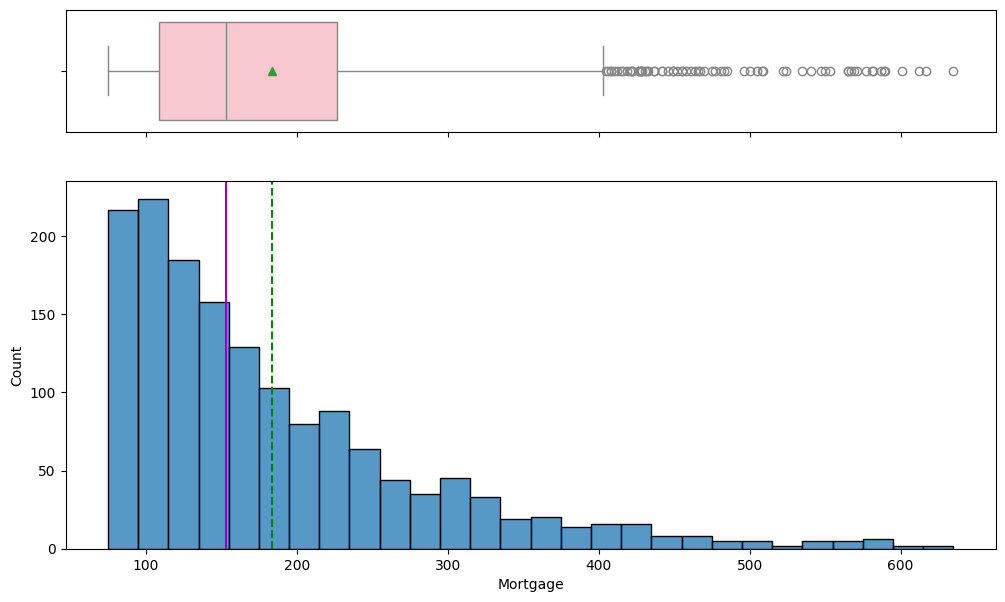

In [108]:
# Extract non zero Mortgage
df_mortgage_nonzero = loan[loan["Mortgage"] != 0].copy()
histogram_boxplot(df_mortgage_nonzero, "Mortgage")

* This excludes no mortgage customers, through right skewness still exist, but provides better picture on mortgage customers
* Lots of outliers observed

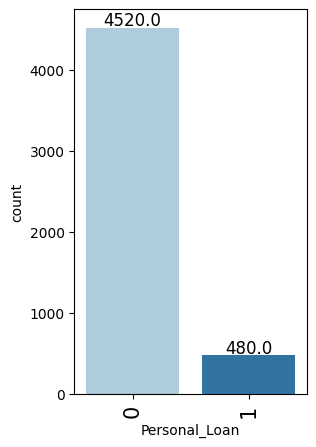

In [109]:
labeled_barplot(loan, "Personal_Loan")

* Most customers do not have personal loan with Bank

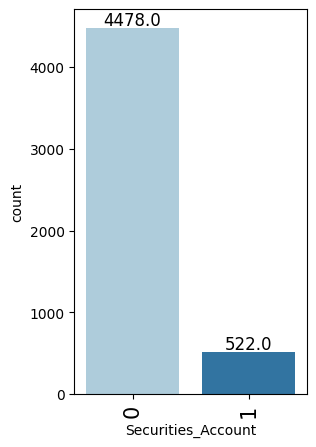

In [110]:
labeled_barplot(loan, "Securities_Account")

* Most customers do not have Securities Account

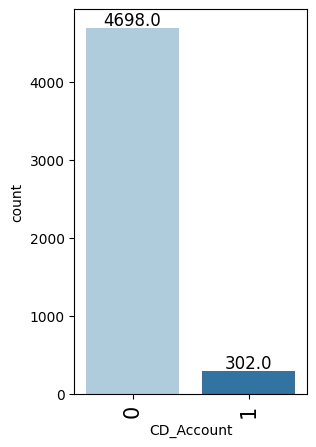

In [111]:
labeled_barplot(loan, "CD_Account")

* Most customers do not have CD Account

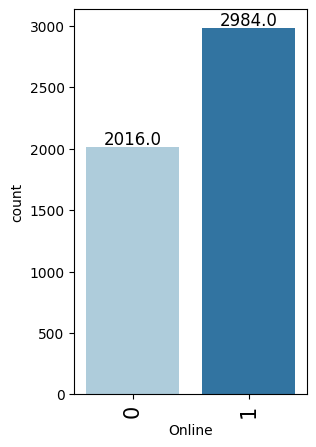

In [112]:
labeled_barplot(loan, "Online")

* Significant number of customers do not use online Banking

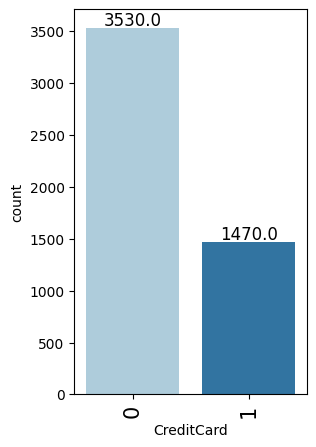

In [113]:
labeled_barplot(loan, "CreditCard")

* 70% Customers use credit card issued by Bank

<Axes: xlabel='count', ylabel='City'>

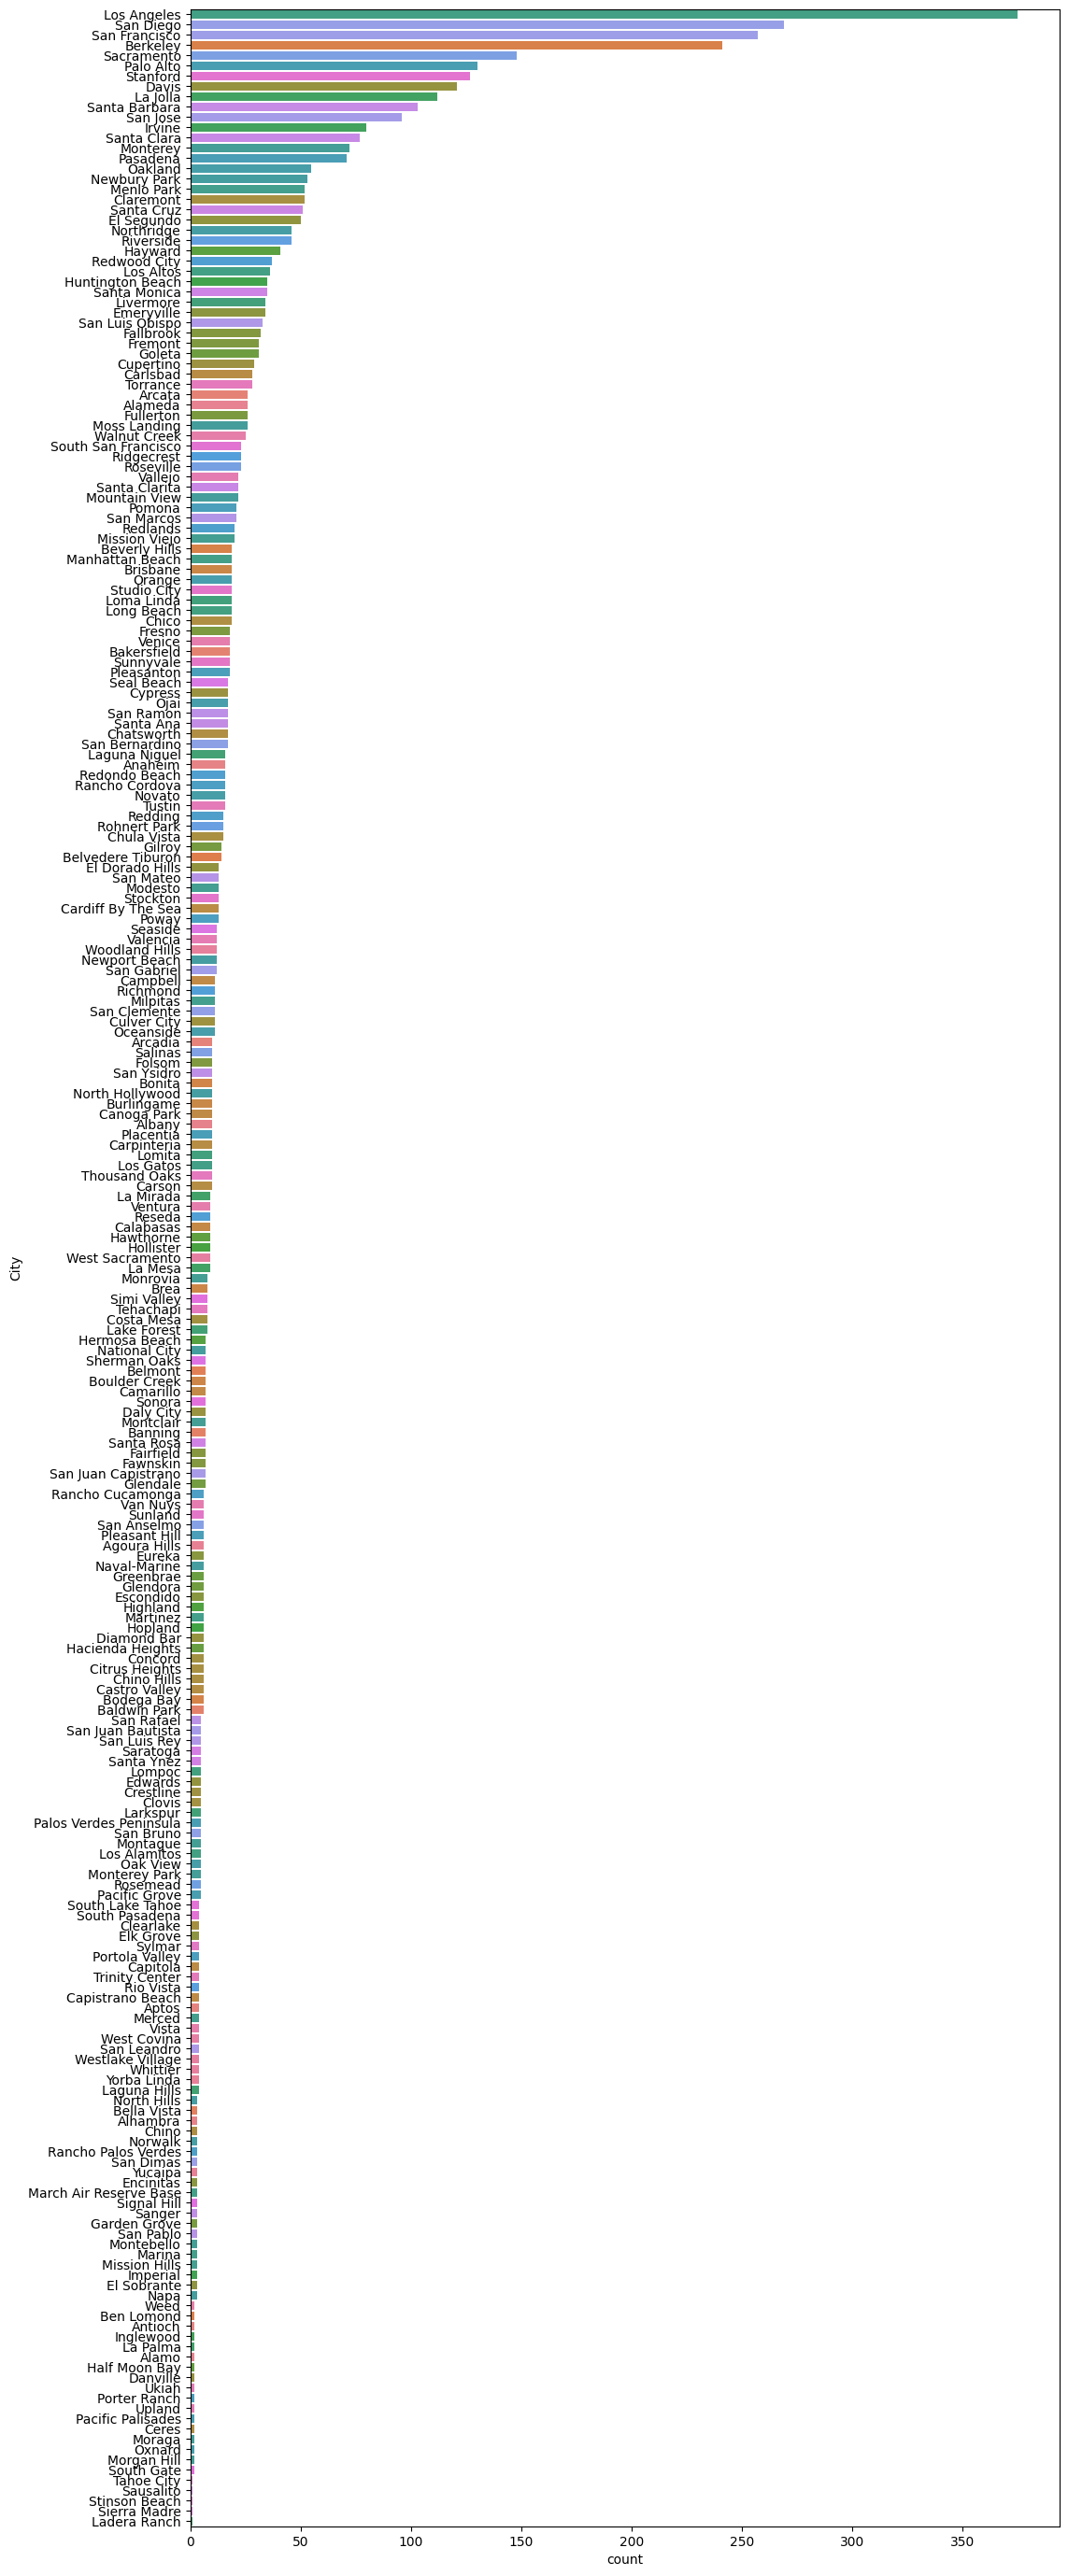

In [114]:
plt.figure(figsize=(12,35))
sns.countplot(data=loan, y='City', hue='City', order=loan['City'].value_counts().index)

* Top cities for customers are Los Angeles, San Diego, San Fransisco and so on.
* Number of cities with very few customers is huge.

### Bivariate Analysis

<Figure size 1500x1500 with 0 Axes>

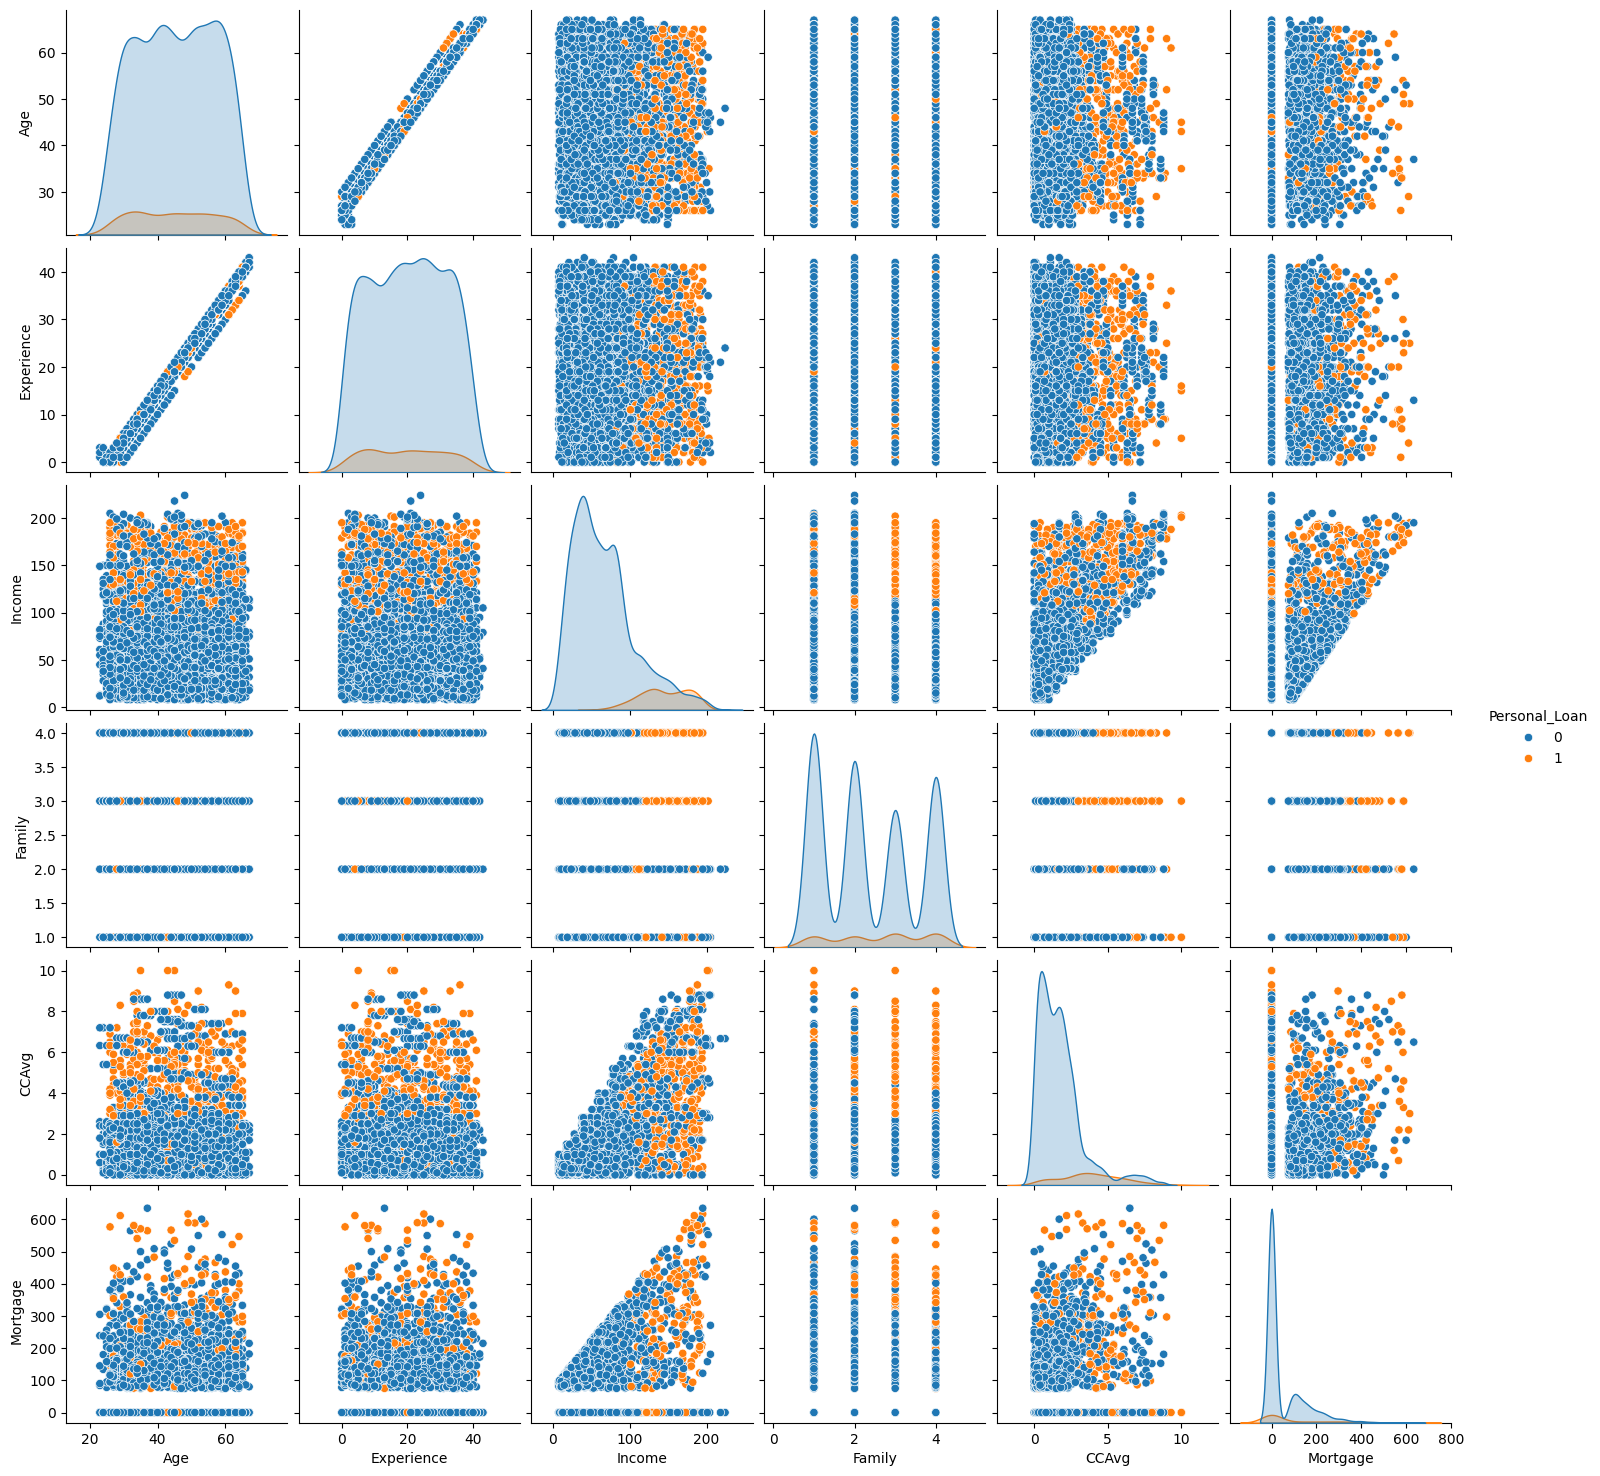

In [115]:
# Simple pair plot to see correlation between different data points
plt.figure(figsize=(15,15))
# sns.pairplot(loan, diag_kind='kde')
sns.pairplot(loan, hue="Personal_Loan")
plt.show()

* Customers with Personal Loan are represented with Orange dots and One without Personal Loan are Blue dots
* Very strong liner correlation between Age and Experiance is observed.
* Custormer with Personal Loans are having :
   * Higher Education
   * Higher Credit Card Average
   * Higher Income
   * Higher Mortgage
   * Higher Family Size

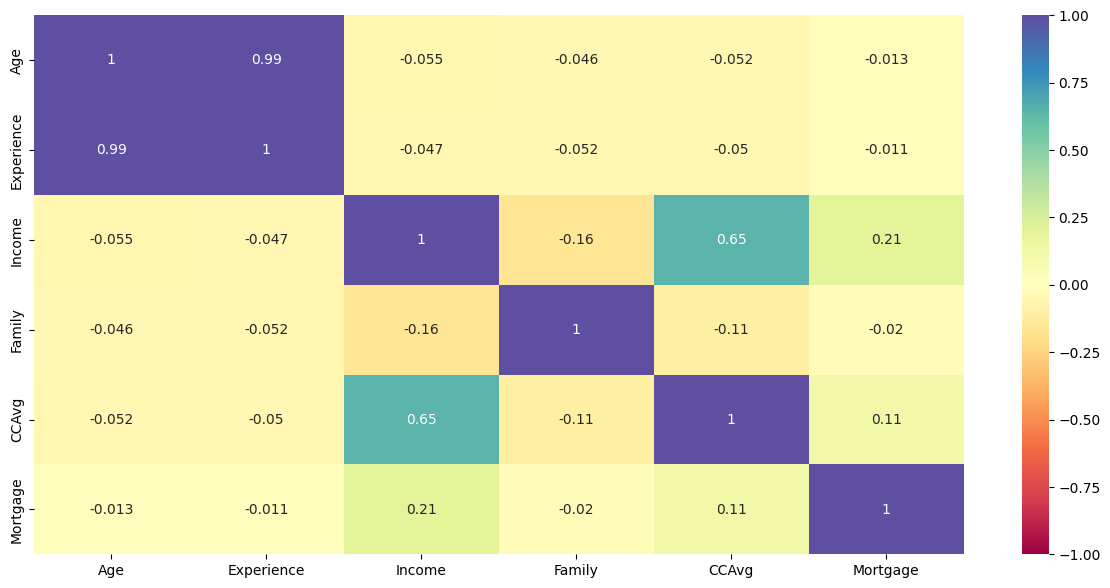

In [116]:
# Check Correlation without City/State
plt.figure(figsize=(15, 7))
orig_loan = loan.drop(['City'], axis=1)
orig_loan.drop(['State'], axis=1, inplace=True)
sns.heatmap(orig_loan.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* Mortgage and Income having slight positive correlation
* Age and Experiance are positively correlated
* Securities Account and CD Account has some correlation

In [117]:
# Define function to plot distributions with target
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()
    
def stacked_barplot(data, predictor, target, n=10):
    top_categories = data[predictor].value_counts().head(n).index
    
    # Filter the data to include only the top n categories
    filtered_data = data[data[predictor].isin(top_categories)]
    
    # Create a crosstab of the predictor and target variables
    crosstab = pd.crosstab(filtered_data[predictor], filtered_data[target], margins=False, normalize='index').sort_values(by=data[target].value_counts().index[-1], ascending=False)
    
    # Print the category counts
    print(crosstab)
    print("-" * 120)
    
    # Plot the stacked bar chart
    ax = crosstab.plot(kind="bar", stacked=True, figsize=(n + 5, 5), rot=0)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.ylabel('Proportion')
    plt.title(f'Stacked Barplot of {predictor} by {target}')
    plt.show()

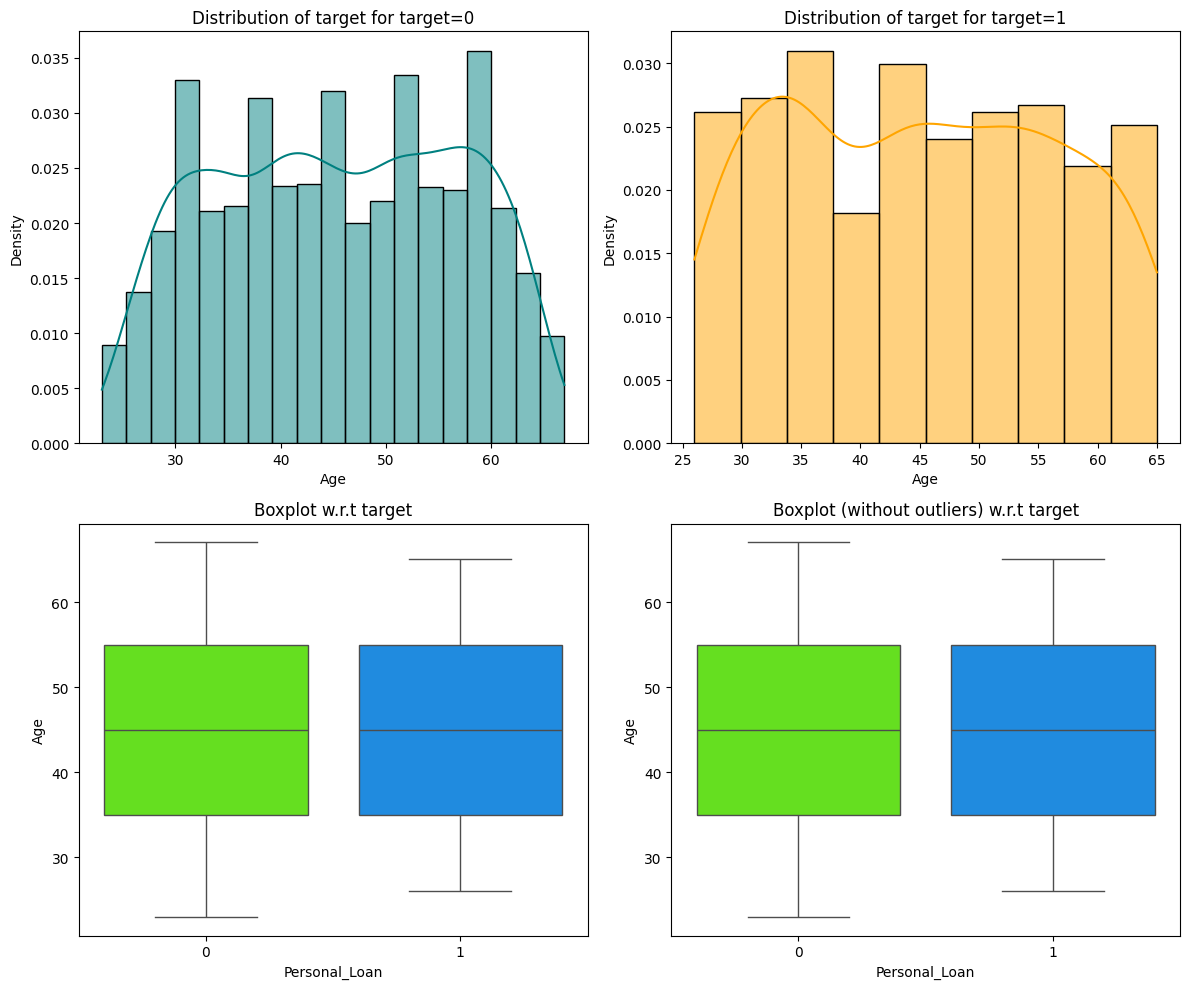

In [118]:
# Plot Age vs Personal Loan
distribution_plot_wrt_target(loan, "Age", "Personal_Loan")

* Multiple peaks observed for both with and without personal loan* 

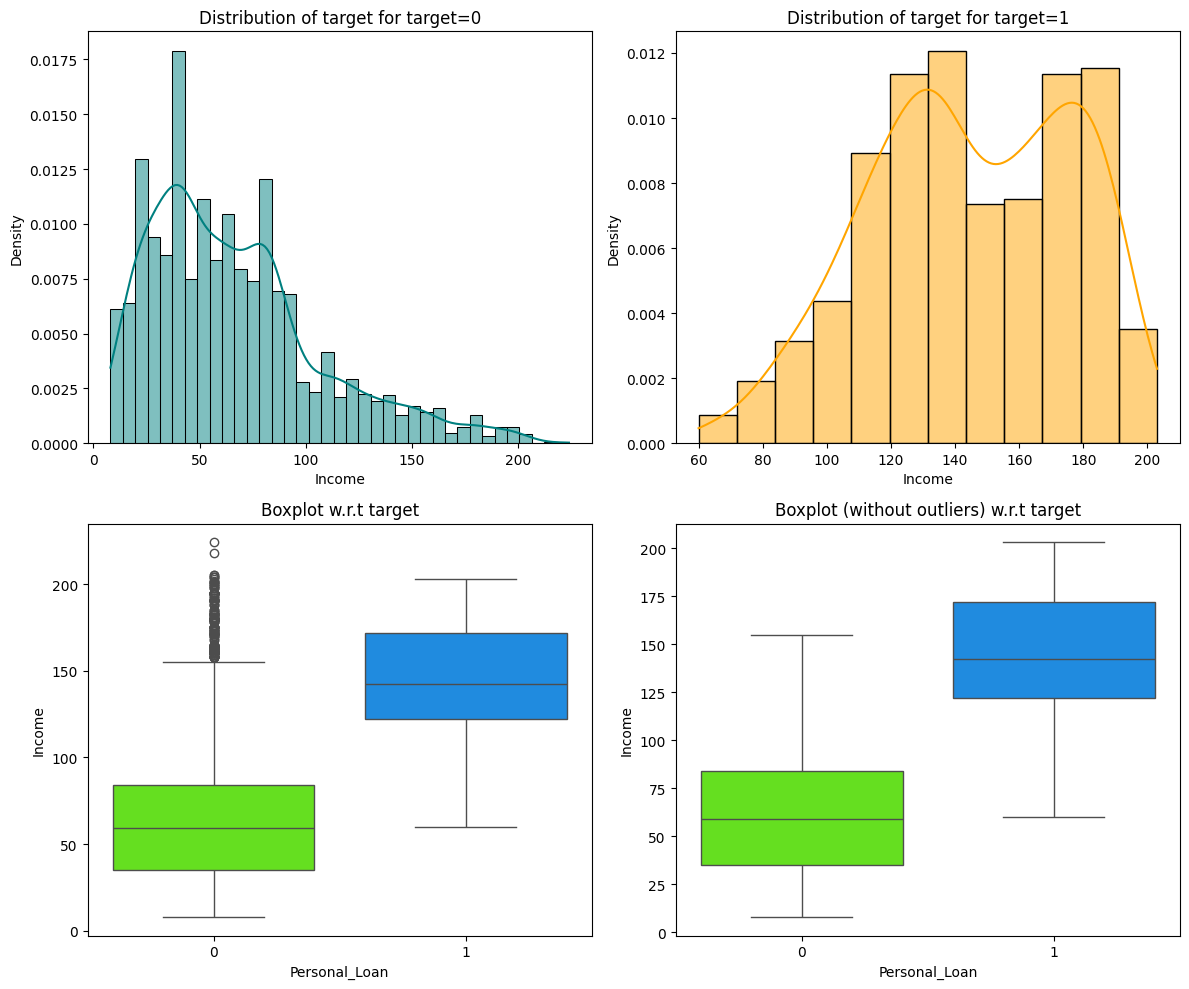

In [119]:
# Plot Income vs Personal_Loan
distribution_plot_wrt_target(loan,'Income','Personal_Loan')

* Income varies greatly between customers with and without personal loan
* Data is skewed to right for customers not having personal loan than ones having it

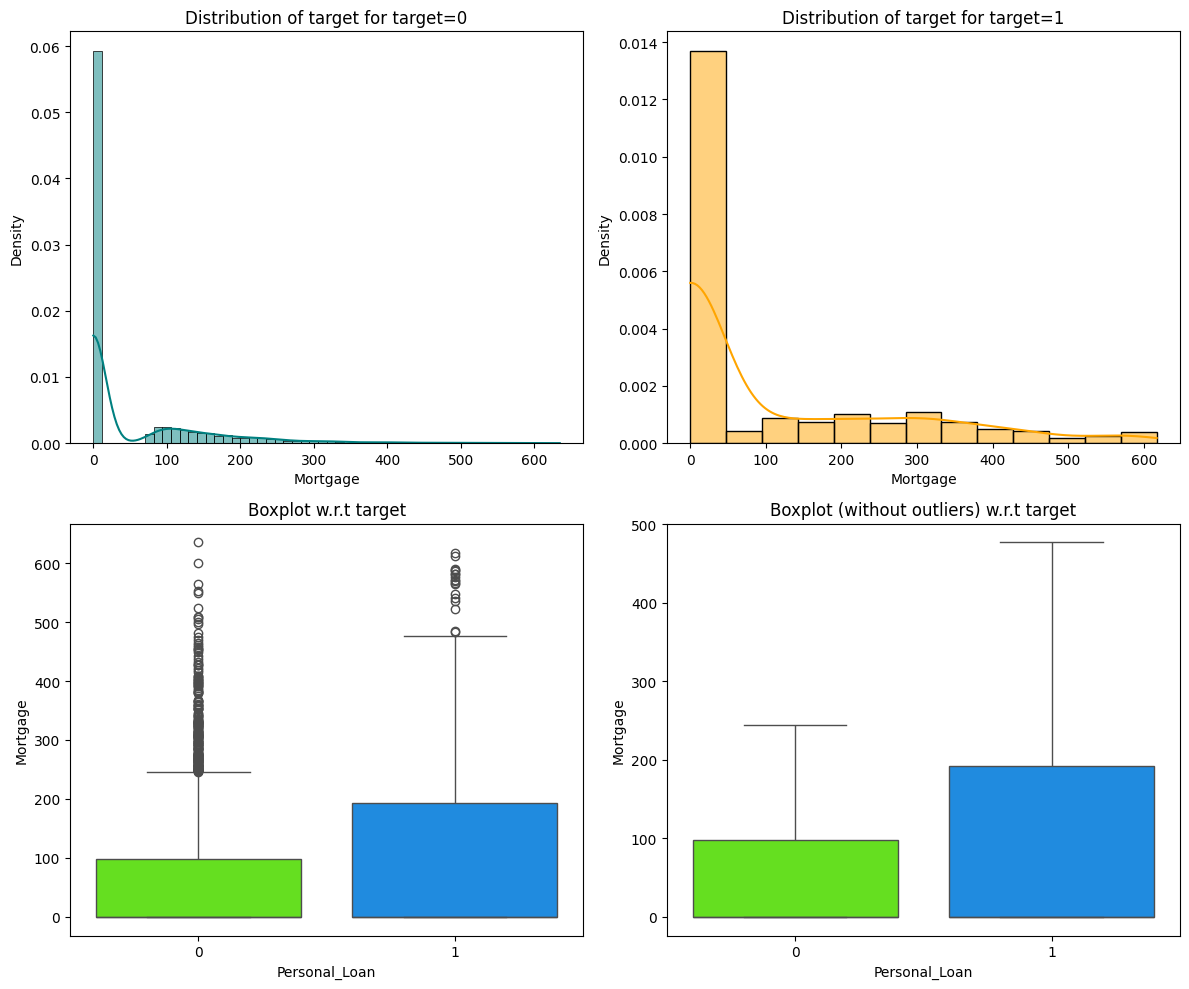

In [120]:
# Plot Mortgage vs Personal_Loan
distribution_plot_wrt_target(loan,'Mortgage','Personal_Loan')

* Data is skewed and needs to analyze with customer having mortgage

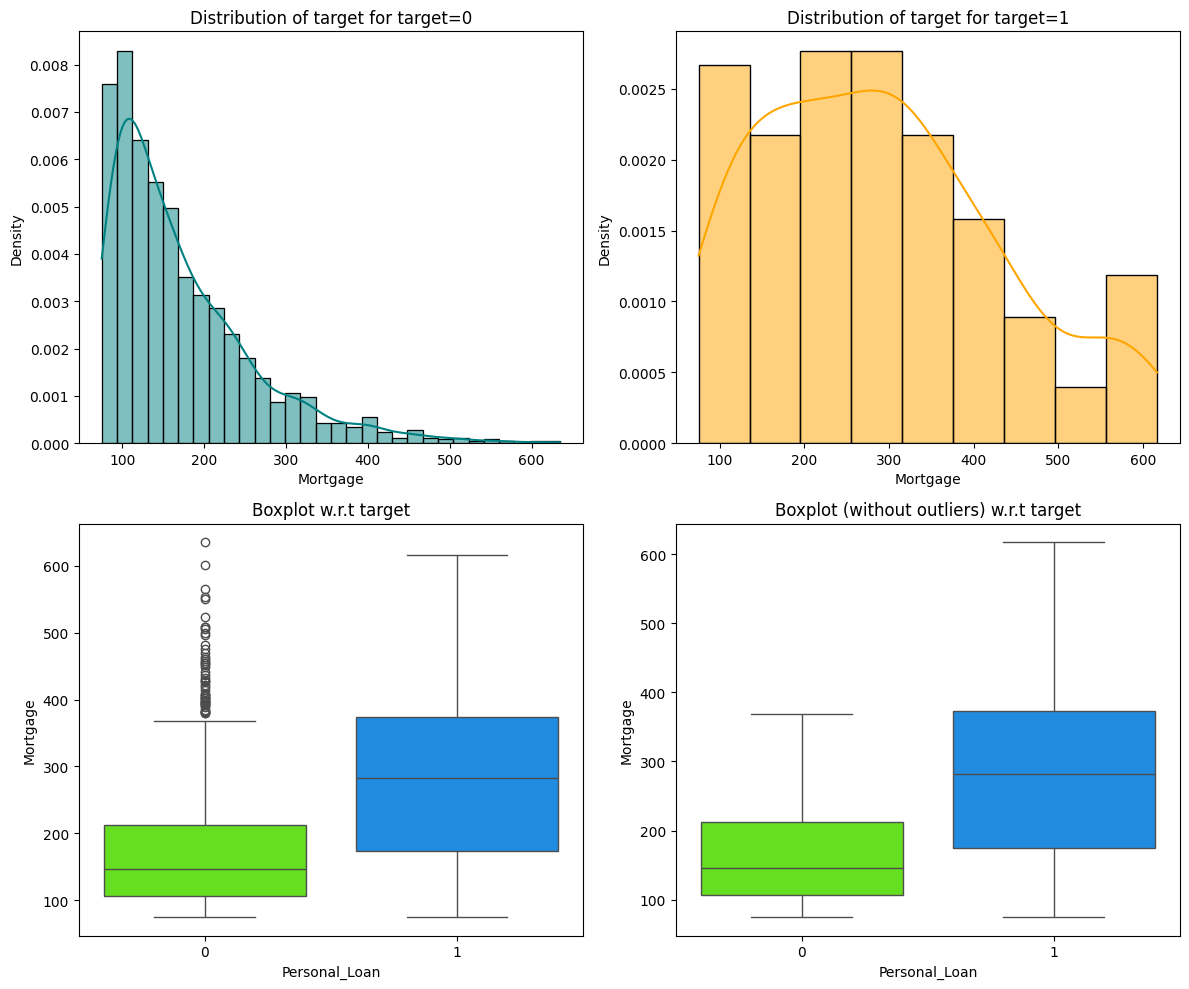

In [121]:
# Plot customers with Mortgage vs Personal Loan
distribution_plot_wrt_target(df_mortgage_nonzero,'Mortgage','Personal_Loan')

* Right skewness is observered in customer with mortgage data.
* Mean value of mortgage paid by customers not having personal loan is much less than customers having personal loan.
* With increase in mortgage value increase, chances for having personal loan is heigher

Personal_Loan         0         1
ZIPCode                          
92093          0.823529  0.176471
90089          0.826087  0.173913
90095          0.887324  0.112676
94720          0.887574  0.112426
94305          0.897638  0.102362
90245          0.900000  0.100000
92037          0.907407  0.092593
91711          0.923077  0.076923
94025          0.923077  0.076923
93943          0.925926  0.074074
93106          0.929825  0.070175
91330          0.934783  0.065217
95616          0.948276  0.051724
91320          0.962264  0.037736
90024          0.980000  0.020000
------------------------------------------------------------------------------------------------------------------------


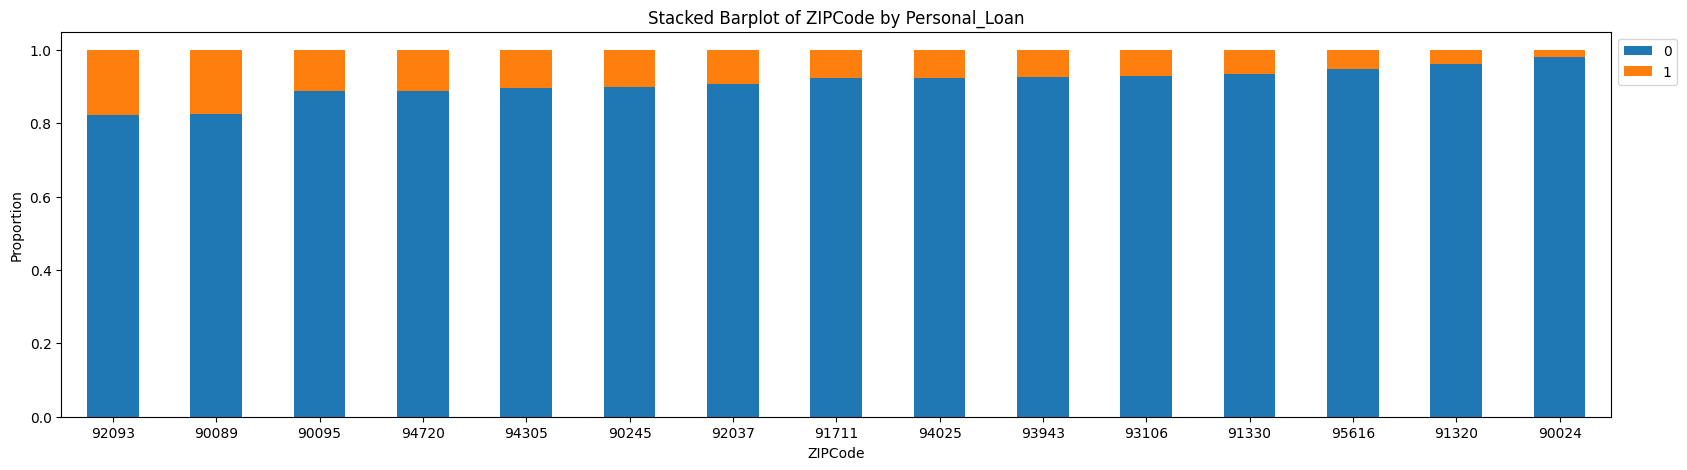

In [122]:
stacked_barplot(loan, "ZIPCode", "Personal_Loan", n=15)

* Customers from zip Codes 92093, 90089, 90095, and 94720 dominates having personal loan 

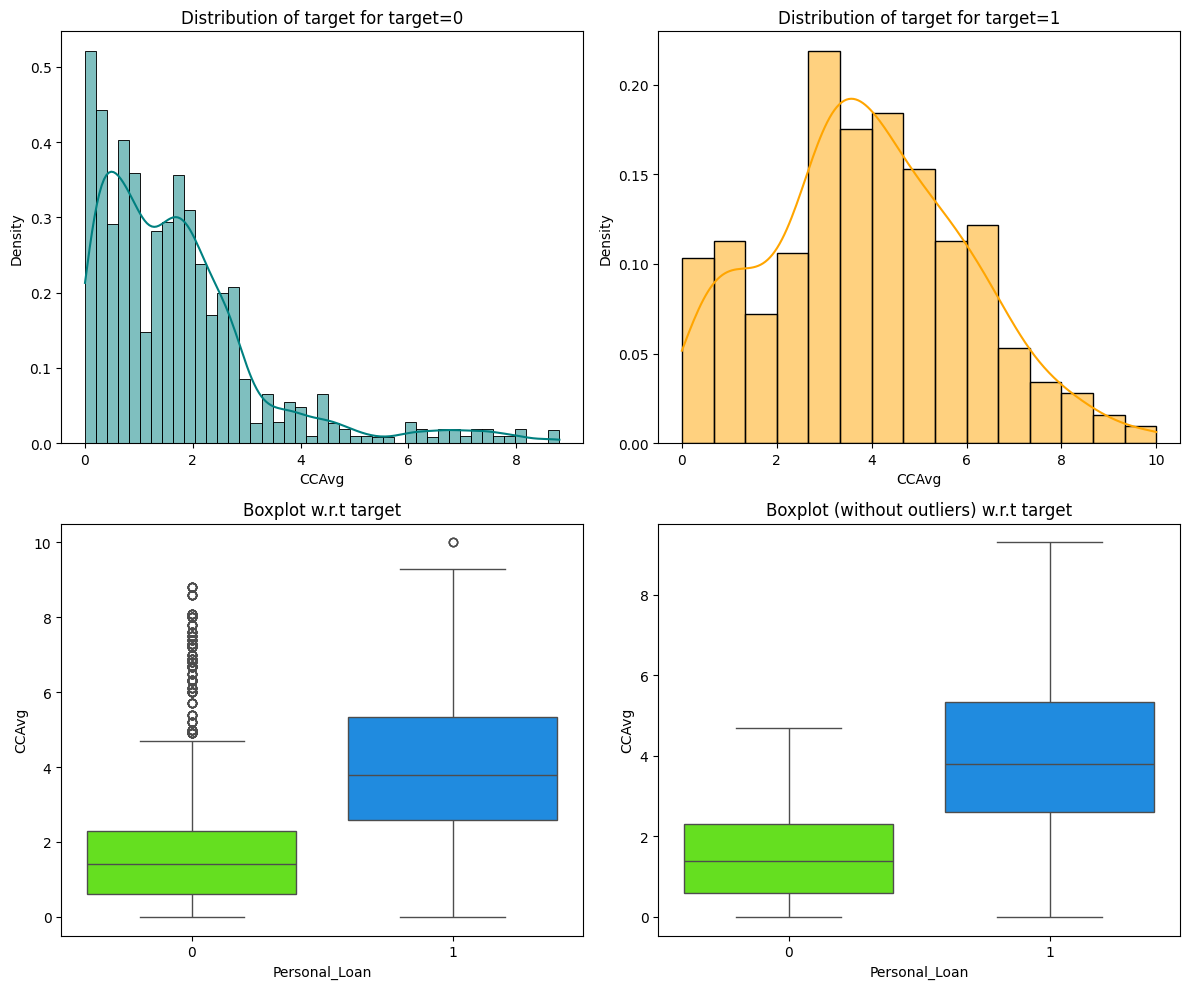

In [123]:
# CCAvg vs Personal_Loan
distribution_plot_wrt_target(loan,'CCAvg','Personal_Loan')

* Customers having personal loan also tend to have heigher credit card spending

Personal_Loan         0         1
Family                           
3              0.868317  0.131683
4              0.890344  0.109656
2              0.918210  0.081790
1              0.927310  0.072690
------------------------------------------------------------------------------------------------------------------------


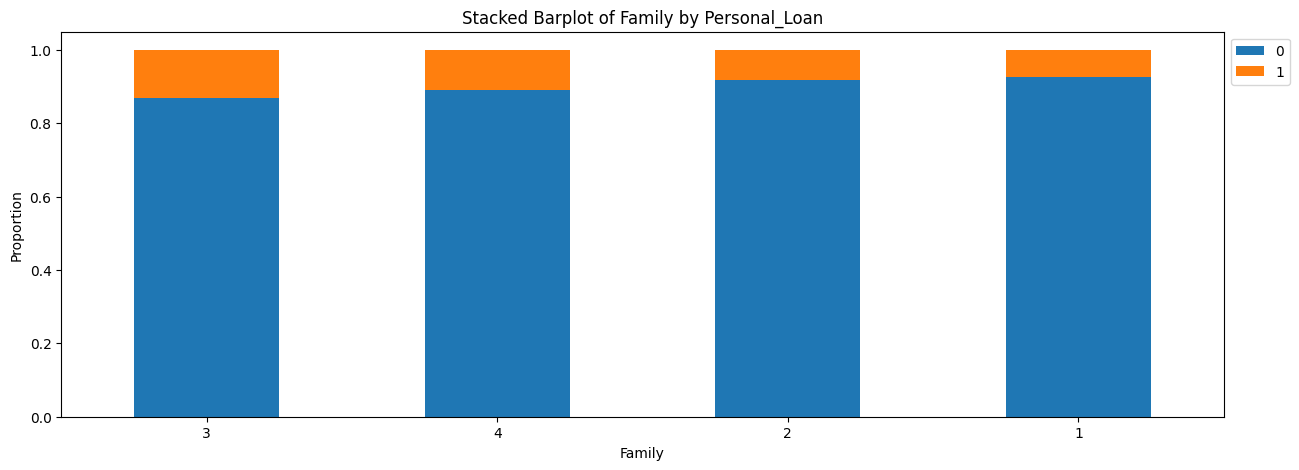

In [124]:
stacked_barplot(loan,'Family','Personal_Loan')

* As family size grows, personal loan use also increases

Personal_Loan         0         1
Education                        
3              0.863424  0.136576
2              0.870278  0.129722
1              0.955630  0.044370
------------------------------------------------------------------------------------------------------------------------


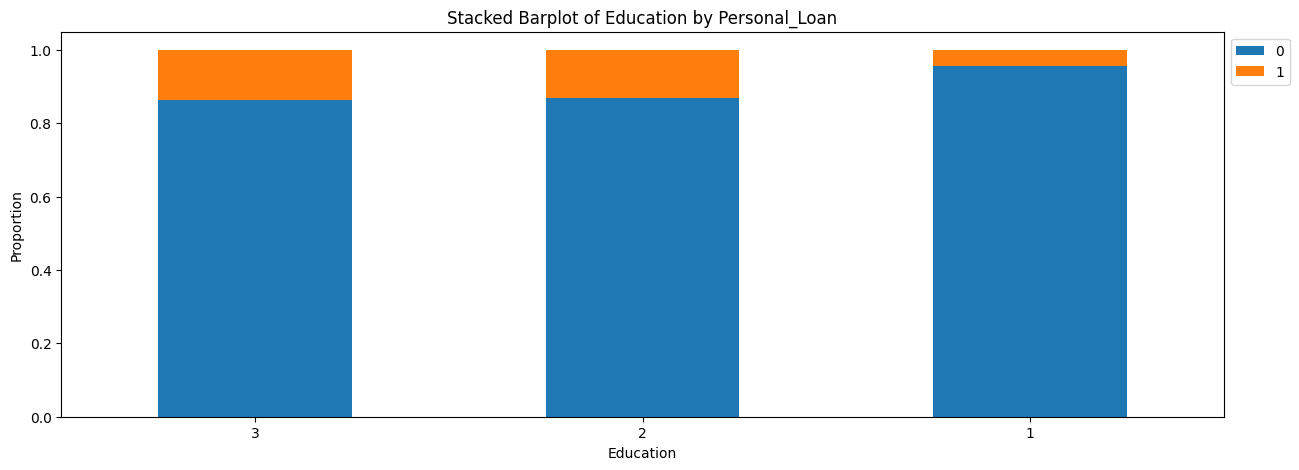

In [125]:
stacked_barplot(loan,'Education','Personal_Loan')

* Heigher Education level customers tend to have more acceptance of personal loan

Personal_Loan              0         1
Securities_Account                    
1                   0.885057  0.114943
0                   0.906208  0.093792
------------------------------------------------------------------------------------------------------------------------


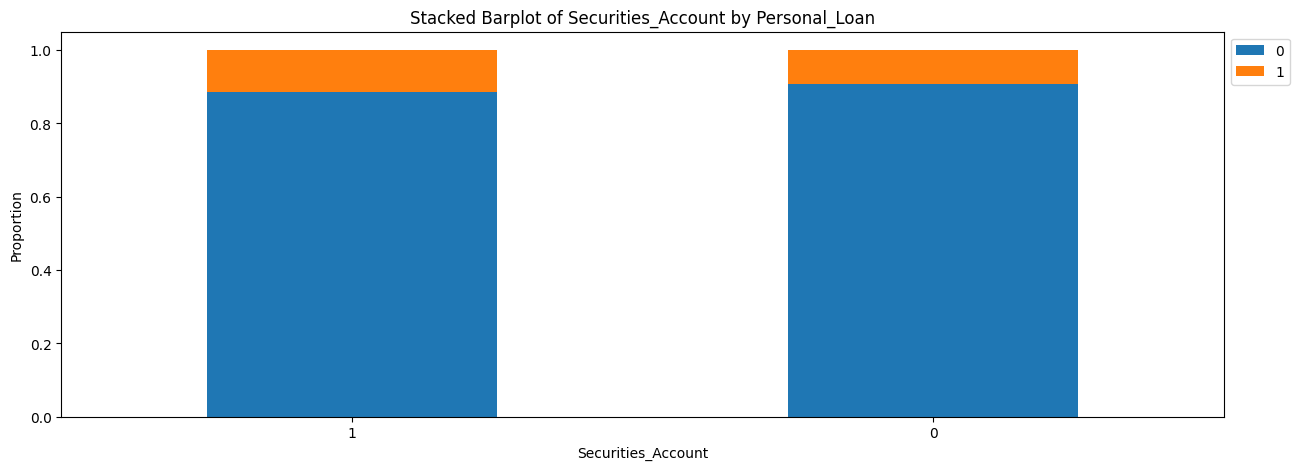

In [126]:
stacked_barplot(loan,'Securities_Account','Personal_Loan')

* Customers having Security account tend to have more acceptance of personal loan

Personal_Loan         0         1
CD_Account                       
1              0.536424  0.463576
0              0.927629  0.072371
------------------------------------------------------------------------------------------------------------------------


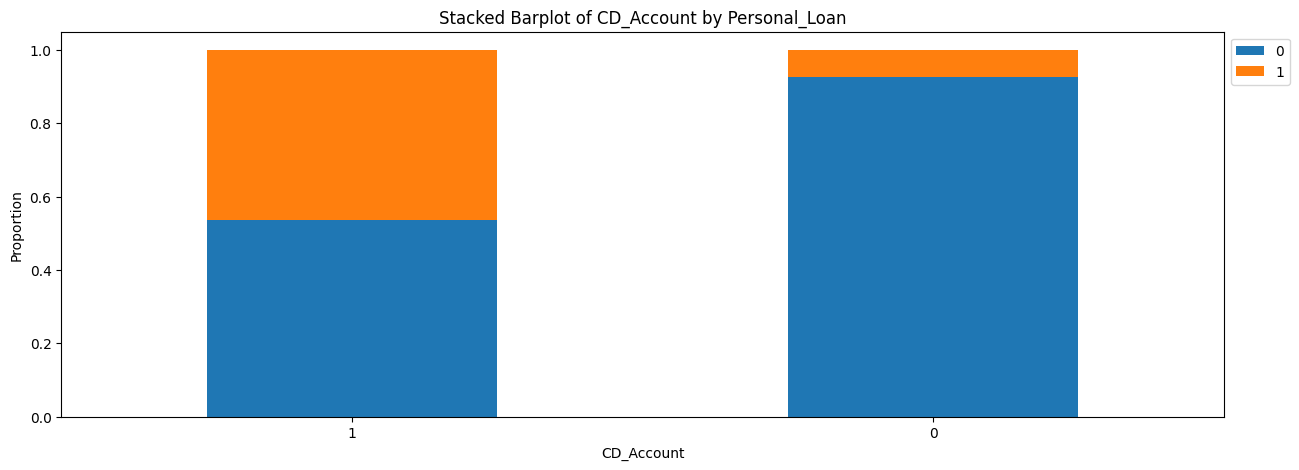

In [127]:
stacked_barplot(loan,'CD_Account','Personal_Loan')

* Customers with CD Account tend to use personal loan more

Personal_Loan        0        1
Online                         
1              0.90248  0.09752
0              0.90625  0.09375
------------------------------------------------------------------------------------------------------------------------


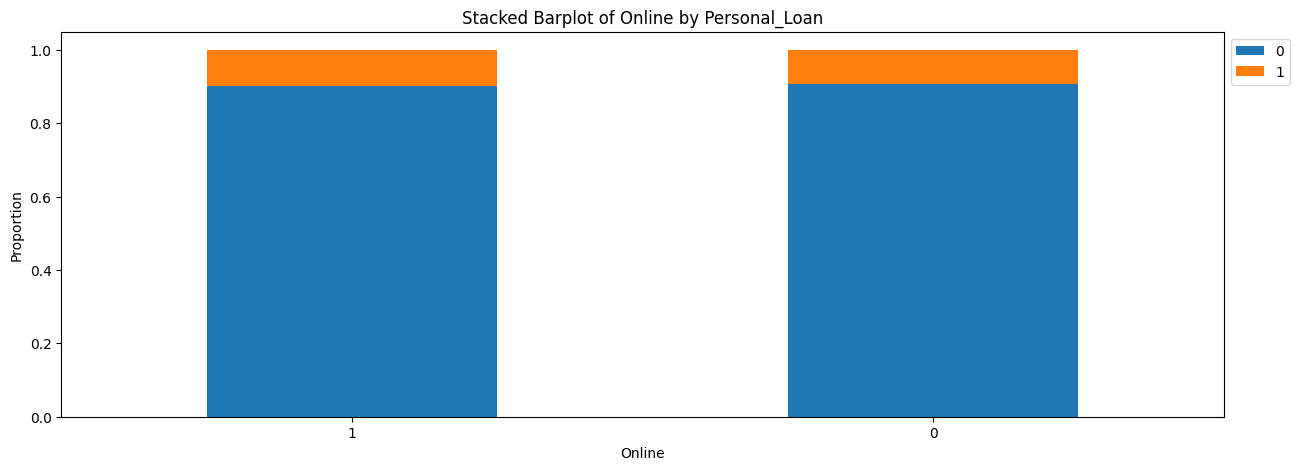

In [128]:
stacked_barplot(loan,'Online','Personal_Loan')

* Online users have slight edge in accepting personal loan

Personal_Loan         0         1
CreditCard                       
1              0.902721  0.097279
0              0.904533  0.095467
------------------------------------------------------------------------------------------------------------------------


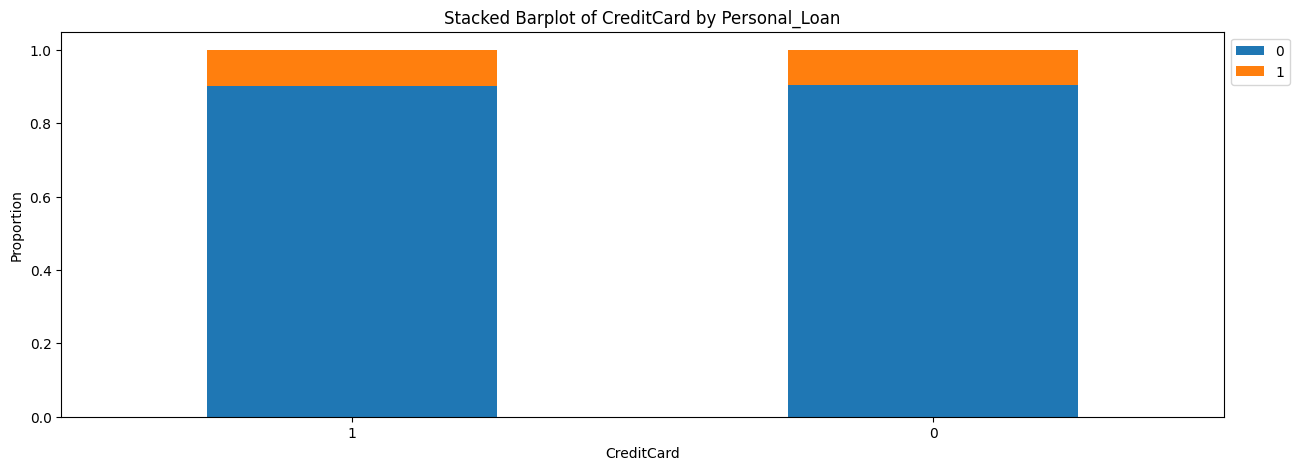

In [129]:
stacked_barplot(loan,'CreditCard','Personal_Loan')

* Customers with or without credit card account tends to have similar acceptance of personal loan

Personal_Loan         0         1
City                             
La Jolla       0.866071  0.133929
Palo Alto      0.876923  0.123077
Berkeley       0.887967  0.112033
Stanford       0.897638  0.102362
Los Angeles    0.898667  0.101333
Sacramento     0.912162  0.087838
San Diego      0.921933  0.078067
Santa Barbara  0.922330  0.077670
San Francisco  0.926070  0.073930
Davis          0.950413  0.049587
------------------------------------------------------------------------------------------------------------------------


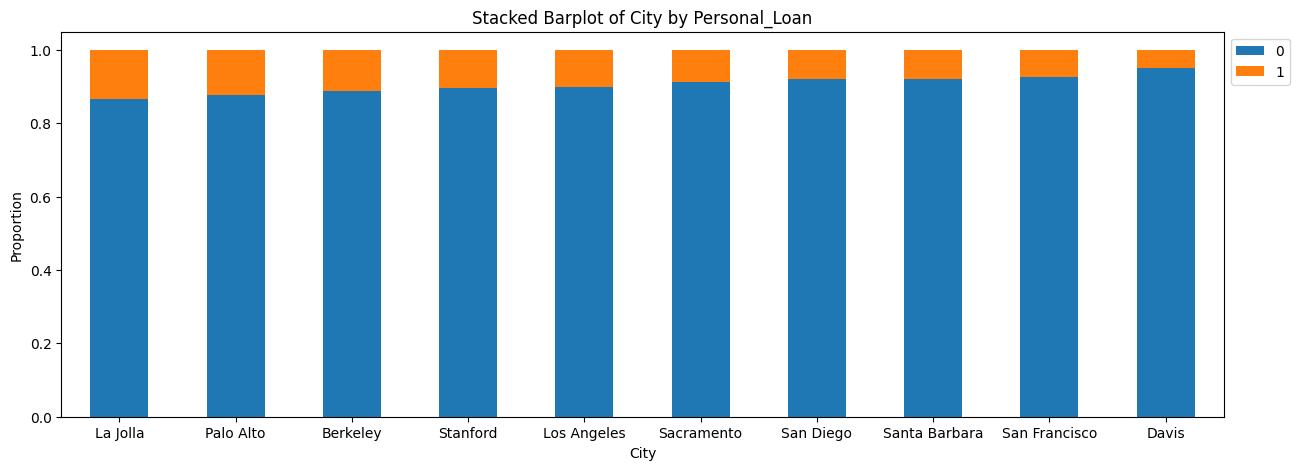

In [130]:
stacked_barplot(loan,'City','Personal_Loan')

* Top 10 cities from above list shows most potential for personal loan

Personal_Loan         0         1
State                            
CA             0.903885  0.096115
AP             1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


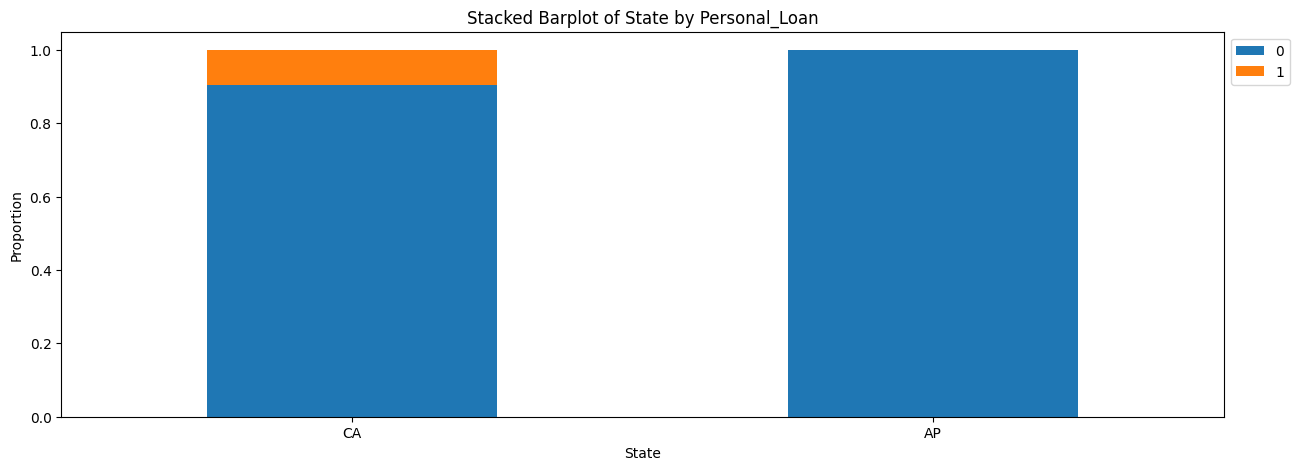

In [131]:
stacked_barplot(loan,'State','Personal_Loan')

* Not much diversity is observed in terms of number of states, though data suggest that customers from California are more willing to accept personal loan

### Key Insights based on EDA

In [132]:
loan.describe(include='all').T

count unique          top    freq      mean         std  \
Age                 5000.0    NaN          NaN     NaN   45.3384   11.463166   
Experience          5000.0    NaN          NaN     NaN   20.1346   11.415189   
Income              5000.0    NaN          NaN     NaN   73.7742   46.033729   
ZIPCode             5000.0  467.0      94720.0   169.0       NaN         NaN   
Family              5000.0    NaN          NaN     NaN    2.3964    1.147663   
CCAvg               5000.0    NaN          NaN     NaN  1.937938    1.747659   
Education           5000.0    3.0          1.0  2096.0       NaN         NaN   
Mortgage            5000.0    NaN          NaN     NaN   56.4988  101.713802   
Personal_Loan       5000.0    2.0          0.0  4520.0       NaN         NaN   
Securities_Account  5000.0    2.0          0.0  4478.0       NaN         NaN   
CD_Account          5000.0    2.0          0.0  4698.0       NaN         NaN   
Online              5000.0    2.0          1.0  2984.0       NaN         NaN   
CreditCard          5000.0    2.0          0.0  3530.0       NaN         NaN   
City                  5000    245  Los Angeles     375       NaN         NaN   
State                 5000      2           CA    4994       NaN         NaN   

                     min   25%   50%    75%    max  
Age                 23.0  35.0  45.0   55.0   67.0  
Experience           0.0  10.0  20.0   30.0   43.0  
Income               8.0  39.0  64.0   98.0  224.0  
ZIPCode              NaN   NaN   NaN    NaN    NaN  
Family               1.0   1.0   2.0    3.0    4.0  
CCAvg                0.0   0.7   1.5    2.5   10.0  
Education            NaN   NaN   NaN    NaN    NaN  
Mortgage             0.0   0.0   0.0  101.0  635.0  
Personal_Loan        NaN   NaN   NaN    NaN    NaN  
Securities_Account   NaN   NaN   NaN    NaN    NaN  
CD_Account           NaN   NaN   NaN    NaN    NaN  
Online               NaN   NaN   NaN    NaN    NaN  
CreditCard           NaN   NaN   NaN    NaN    NaN  
City                 NaN   NaN   NaN    NaN    NaN  
State                NaN   NaN   NaN    NaN    NaN

### Key Findings from Univariate Analysis:

* The age range of customers spans from a minimum of 23 years to a maximum of 67 years, with an average age of 45 years. The data seems to somewhat align with a uniform distribution.
* The years of experience range from 0 to 43, with an average of approximately 20 years.
* The minimum CCAvg is USD 0k (possibly indicating customers without credit cards), while the maximum is USD 1.9K, and the average stands at USD 10K.
* Around 69% of customers are not paying a mortgage, while the remaining 31% have mortgage amounts ranging from approximately USD 99K to 635K, with an average mortgage value between USD 180K and 200K.
* The leading cities with the highest number of customers are Los Angeles, followed by San Diego, San Francisco, Berkeley, and Sacramento.
* California (CA) emerges as the state with the highest concentration of customers.
* Family sizes predominantly consist of 1 member (29.4%), followed by 2 members (25.9%), 4 members (24.4%), and 3 members (20.2%).
* Customer education levels are as follows:
    * 41.9% have an undergraduate degree.
    * 28.1% hold a graduate degree.
    * 30.0% possess an advanced or professional degree.
* A significant 94% of customers do not have a CD_Account, while only 6% hold a CD_Account.
* 40.3% of customers do not use online banking services, leaving 59.7% who do.
* 70.6% of customers do not possess a credit card, while 29.4% do.
* Regarding the target variable, Personal_Loan, 90.4% of customers did not accept a loan, while 9.6% did.

### Key Insights from Multivariate Analysis:

* Correlation between variables:

    * A strong correlation (0.98) is observed between Age and Experience.
    * The relationship between Income and CCAvg is relatively weak (0.65).
    * The correlation between other variable pairs is minimal and not significant.

* Impact of variables on the target (Personal_Loan):

    * Income: Higher income increases the likelihood of loan acceptance.
    * Family Size: Larger family sizes correlate with higher loan acceptance rates.
    * CCAvg: Increased monthly spending leads to a higher probability of accepting a personal loan.
    * Education: Customers with higher education levels are more likely to accept a personal loan.
    * Mortgage: Higher mortgage amounts are linked to greater loan acceptance.
    * City: Santa Clara has the highest proportion of customers accepting loans, followed by Pasadena and Irvine.
    * State: Customers from California are more inclined to accept personal loans.
    * Securities Account: Customers with a securities account show a greater likelihood of accepting a loan.
    * CD Account: Having a CD Account increases the chances of accepting a personal loan.
    * Online Banking: No significant effect observed on loan acceptance.
    * Age, Experience, Credit Card: These variables show no notable influence on the target variable.

* Expected Target Dependencies:

    * Low Importance: Age, Experience, Credit Card, and Online Banking have minimal impact on loan acceptance.
    * Medium to High Importance: Income, Family Size, CCAvg, Education, Mortgage, Securities Account, and CD Account are expected to have a significant influence on loan acceptance.

## Model Building

### Data Preparation for modelling

Data Pre-proccesing actions take before :

1. Dropped unwanted ID column
2. Negative values in Experience column replaced by positive one, assuming its typo, median could have been used to replace -ve value but converting -ve to positive is natural fit.
3. ZIP Code Column was split into City and state then dropped

1. Creating the dummy variables

In [133]:
loan.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'City', 'State'],
      dtype='object')

In [134]:
df_model = pd.get_dummies(
    loan,
    columns=[
        "Education",
        "City",
        "State",
    ],
    drop_first=True,
)
df_model.head()

Age  Experience  Income ZIPCode  Family  CCAvg  Mortgage Personal_Loan  \
0   25           1      49   91107       4    1.6         0             0   
1   45          19      34   90089       3    1.5         0             0   
2   39          15      11   94720       1    1.0         0             0   
3   35           9     100   94112       1    2.7         0             0   
4   35           8      45   91330       4    1.0         0             0   

  Securities_Account CD_Account Online CreditCard  Education_2  Education_3  \
0                  1          0      0          0            0            0   
1                  1          0      0          0            0            0   
2                  0          0      0          0            0            0   
3                  0          0      0          0            1            0   
4                  0          0      0          1            1            0   

   City_Alameda  City_Alamo  City_Albany  City_Alhambra  City_Anaheim  \
0             0           0            0              0             0   
1             0           0            0              0             0   
2             0           0            0              0             0   
3             0           0            0              0             0   
4             0           0            0              0             0   

   City_Antioch  City_Aptos  City_Arcadia  City_Arcata  City_Bakersfield  \
0             0           0             0            0                 0   
1             0           0             0            0                 0   
2             0           0             0            0                 0   
3             0           0             0            0                 0   
4             0           0             0            0                 0   

   City_Baldwin Park  City_Banning  City_Bella Vista  City_Belmont  \
0                  0             0                 0             0   
1                  0             0                 0             0   
2                  0             0                 0             0   
3                  0             0                 0             0   
4                  0             0                 0             0   

   City_Belvedere Tiburon  City_Ben Lomond  City_Berkeley  City_Beverly Hills  \
0                       0                0              0                   0   
1                       0                0              0                   0   
2                       0                0              1                   0   
3                       0                0              0                   0   
4                       0                0              0                   0   

   City_Bodega Bay  City_Bonita  City_Boulder Creek  City_Brea  City_Brisbane  \
0                0            0                   0          0              0   
1                0            0                   0          0              0   
2                0            0                   0          0              0   
3                0            0                   0          0              0   
4                0            0                   0          0              0   

   City_Burlingame  City_Calabasas  City_Camarillo  City_Campbell  \
0                0               0               0              0   
1                0               0               0              0   
2                0               0               0              0   
3                0               0               0              0   
4                0               0               0              0   

   City_Canoga Park  City_Capistrano Beach  City_Capitola  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0            

In [135]:
# get shape of the dataset
df_model.shape

(5000, 259)

2. Splitting the data

In [136]:
# Define Variables
x = loan.drop(["Personal_Loan"], axis=1)
y = loan["Personal_Loan"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [137]:
# Show  train and test dataset shape
print(f'X_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape:(3500, 14)
X_test shape:(1500, 14)


In [138]:
# % of target variable classes in the train and test sets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### Model Evaluation Criterion

A model's incorrect predictions can lead to two types of errors:

1. False Positive: Predicting a customer would take a loan, but they actually wouldn’t.
    * This results in wasted resources.
2. False Negative: Predicting a customer would not take a loan, but they actually would.
    * This leads to missed opportunities.

#### Which error should we prioritize minimizing?
    * A False Negative is more critical as it implies a missed opportunity to provide a loan to a willing customer.

#### How to reduce False Negatives?
    * To mitigate this, we aim to maximize recall, as higher recall reduces the chances of False Negatives.

### Next Steps:
1. Metric Functions:
    * Develop a get_recall_score function to evaluate model performance.
2. Visualization:
    * Create a make_confusion_matrix function to visualize confusion matrices and analyze the results of the models.

In [139]:
# Define Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

# Define Function for confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

1. **Logistic Regression**  
Let's begin by defining functions to aid in evaluating the performance of the Logistic Regression model:  

- **`confusion_matrix_sklearn_with_threshold`**: Generates the confusion matrix for the classification model.  
- **`model_performance_classification_sklearn_with_threshold`**: Calculates various evaluation metrics.  
- **`plot_prec_recall_vs_thresh`**: Visualizes precision and recall against different thresholds.  

In [140]:
# Define function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [141]:
# Define function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [142]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

### Building the Model

In [143]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is applied as it is faster for high-dimensional data
# Fitting a logistic regression model to the data
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

ValueError: could not convert string to float: 'Palo Alto'

### Finding the coefficients

In [ ]:
# Check the coefficients and intercept of the model
coef_df = pd.DataFrame(np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age  Experience    Income   ZIPCode    Family    CCAvg  \
Coefficients -0.028823    0.033969  0.052321 -0.000023  0.715497  0.17129   

              Education  Mortgage  Securities_Account  CD_Account    Online  \
Coefficients   1.669385  0.000769           -0.812192    3.230111 -0.529824   

              CreditCard      City     State  Intercept  
Coefficients   -0.923275  0.002315 -0.184134 -10.645158

### Coefficient interpretations

In [ ]:
# The positive coefficients
coef_df[coef_df['Coefficients']>0].sort_values(by='Coefficients',ascending=False).T

CD_Account  Education    Family    CCAvg    Income  Experience  \
Coefficients    3.230111   1.669385  0.715497  0.17129  0.052321    0.033969   

                  City  Mortgage  
Coefficients  0.002315  0.000769

In [ ]:
# The Negative coefficients
coef_df[coef_df['Coefficients']<0].sort_values(by='Coefficients').T

Intercept  CreditCard  Securities_Account    Online     State  \
Coefficients -10.645158   -0.923275           -0.812192 -0.529824 -0.184134   

                   Age   ZIPCode  
Coefficients -0.028823 -0.000023

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_test.columns).sort_values(by='Odds',ascending=False)

Odds  Change_odd%
CD_Account          25.282462  2428.246156
Education            5.308902   430.890217
Family               2.045203   104.520338
CCAvg                1.186834    18.683431
Income               1.053713     5.371344
Experience           1.034552     3.455212
City                 1.002318     0.231813
Mortgage             1.000769     0.076893
ZIPCode              0.999977    -0.002297
Age                  0.971589    -2.841130
State                0.831824   -16.817552
Online               0.588709   -41.129117
Securities_Account   0.443884   -55.611604
CreditCard           0.397216   -60.278393

The top variables affecting the target variable positively are:

CD_Account : increases the customer odds of accepting a personal loan by 25 times

The top variables affecting the target variable Negatively are:

CreditCard : decreases the customer odds of accepting a personal loan by 0.44 times
Securities_Account : decreases the customer odds of accepting a personal loan by 0.42 times

### Model Performamce Evaluation

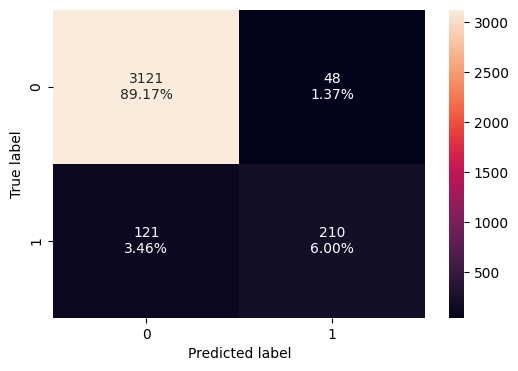

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [ ]:
# Checking performance on test set
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.951714  0.634441   0.813953  0.713073

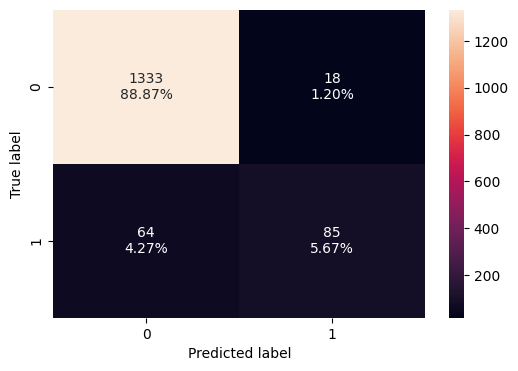

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy   Recall  Precision        F1
0  0.945333  0.57047   0.825243  0.674603

#### Observation: The Recall on the training and test sets are close in value 62% and 68% respectively, yet the model performance needs to be improved as viewed from the confusion matrix as well:

    * TP 6.20% which is less than tha 9% positive class of the dataset

#### Plotting the ROC-AUC for both training and test set
    * ROC-AUC on training set

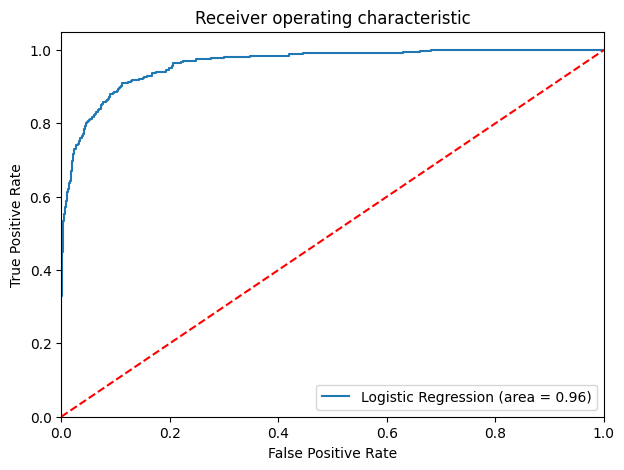

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The AUC scores for the ROC curves of the test and train models are 0.96 and 0.97, respectively, which are close to 1. This suggests that the model performs very well but could benefit from further refinement. 
Therefore, our strategy involves adjusting the threshold and evaluating how it impacts the model's performance.

## Model Performance Improvement

1- We derive the optimal threshold from the AUC,ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
y_predict_train_proba = lg.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_predict_train_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f'The optimal threshhold from ROC AUC curve is : {optimal_threshold_auc_roc}')

The optimal threshhold from ROC AUC curve is : 0.09213158467892742


### Checking model performance on training set

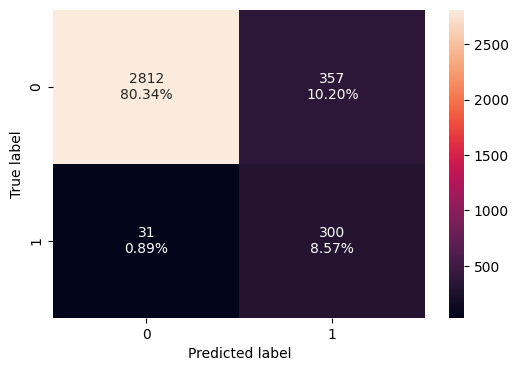

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
# from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100)

In [ ]:
X_train.shape

(3500, 257)

In [ ]:
# we will first build model with all varaible
sfs = SFS(
    model,
    k_features=257,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    2.8s finished

[2022-02-25 14:36:01] Features: 1/257 -- score: 0.40456944185757754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    3.5s finished

[2022-02-25 14:36:05] Features: 2/257 -- score: 0.5370139749429014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 255 | elapsed:    4.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:    4.6s finished

[2022-02-25 14:36:10] Features: 3/257 -- score: 0.5743776563448694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 216 out of 231 | elapsed:    5.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    5.8s finished

[2022-02-25 14:38:14] Features: 27/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    5.6s finished

[2022-02-25 14:38:20] Features: 28/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 214 out of 229 | elapsed:    5.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    5.9s finished

[2022-02-25 14:38:26] Features: 29/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    6.4s finished

[2022-02-25 14:42:50] Features: 53/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    6.2s finished

[2022-02-25 14:42:57] Features: 54/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    6.7s finished

[2022-02-25 14:43:03] Features: 55/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 con

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:    7.1s finished

[2022-02-25 15:15:18] Features: 77/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.9s finished

[2022-02-25 15:15:25] Features: 78/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:    7.2s finished

[2022-02-25 15:15:32] Features: 79/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | 

[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:    8.3s finished

[2022-02-25 15:29:22] Features: 102/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:    8.9s finished

[2022-02-25 15:29:31] Features: 103/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:    8.5s finished

[2022-02-25 15:29:40] Features: 104/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:    9.0s finished

[2022-02-25 15:29:49] Features: 105/257 -- score: 0.7538248575435089[Parallel(n_jobs=-1)]: Usi

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    9.8s finished

[2022-02-25 15:34:10] Features: 132/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.0s finished

[2022-02-25 15:34:20] Features: 133/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    9.8s finished

[2022-02-25 15:34:30] Features: 134/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:   10.1s finished

[2022-02-25 15:34:40] Features: 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    9.9s finished

[2022-02-25 15:42:23] Features: 162/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   10.0s finished

[2022-02-25 15:42:33] Features: 163/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    9.9s finished

[2022-02-25 15:42:43] Features: 164/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:   10.0s finished

[2022-02-25 15:42:53] Features: 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    9.9s finished

[2022-02-25 15:47:27] Features: 192/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    9.8s finished

[2022-02-25 15:47:37] Features: 193/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    9.7s finished

[2022-02-25 15:47:47] Features: 194/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    9.8s finished

[2022-02-25 15:47:57] Features: 

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    6.9s finished

[2022-02-25 15:51:49] Features: 223/257 -- score: 0.7582494698284171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    6.4s finished

[2022-02-25 15:51:55] Features: 224/257 -- score: 0.7569891049859626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    6.2s finished

[2022-02-25 15:52:01] Features: 225/257 -- score: 0.7569891049859626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    6.0s finished

[2022-02-25 15:52:08] Features: 226/257 -- score: 0.7569891049859626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    5.9s finished

[2022-02-25 15:52:14] Features: 227/257 -- score: 0.756989104985

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.5s finished

[2022-02-25 15:53:49] Features: 252/257 -- score: 0.7369376484002524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished

[2022-02-25 15:53:51] Features: 253/257 -- score: 0.7342874057724064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished

[2022-02-25 15:53:52] Features: 254/257 -- score: 0.7296624599709899[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

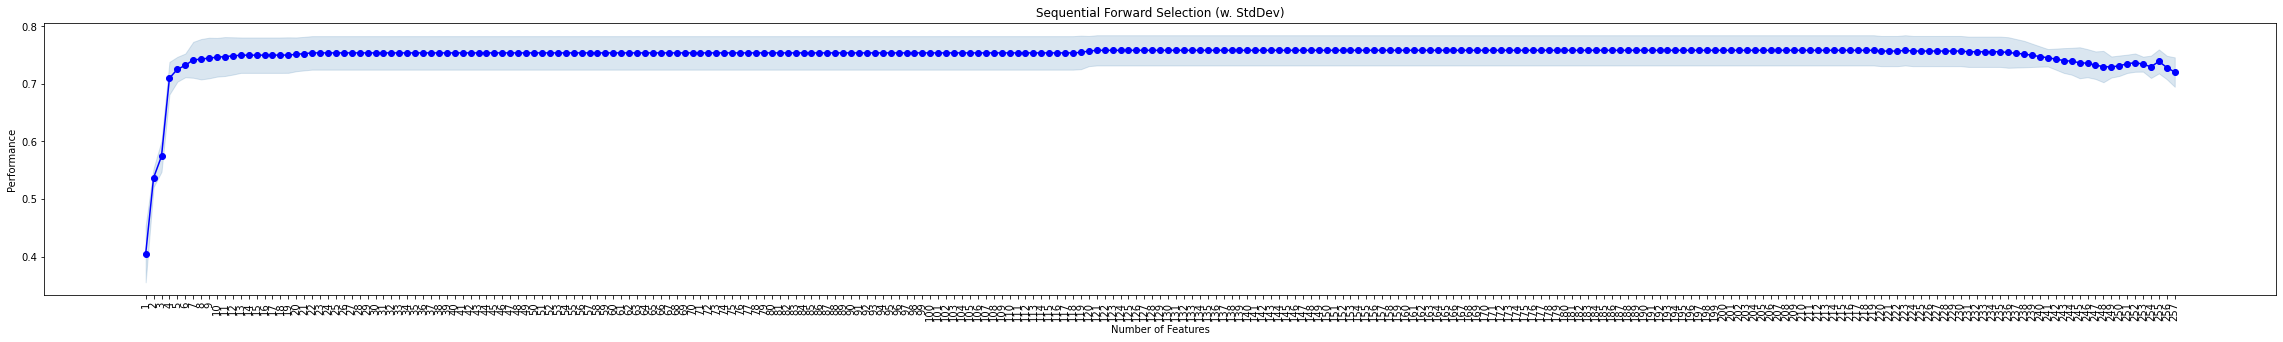

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(40, 5))

plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

We can see that from approx the 22nd feature the performance start to stay constant, hence let us create a new model with 20 variables only and display the top 20 features 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    1.0s finished

[2022-02-25 15:57:31] Features: 1/22 -- score: 0.40456944185757754[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    3.7s finished

[2022-02-25 15:57:35] Features: 2/22 -- score: 0.5370139749429014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 255 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:    4.8s finished

[2022-02-25 15:57:40] Features: 3/22 -- score: 0.5743776563448694[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=

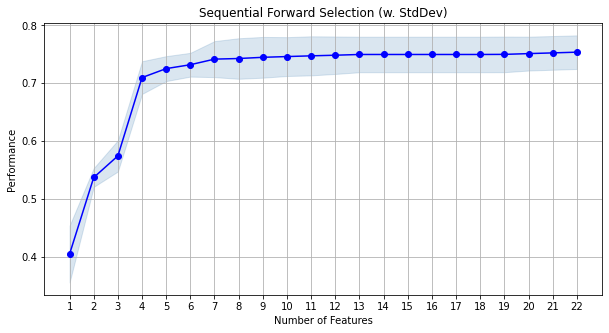

In [ ]:
sfs1 = SFS(
    model,
    k_features=22,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

Perfect! Now let us display the most important feature names.:


In [ ]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
X_train.columns[feat_cols]

[2, 3, 6, 7, 9, 10, 11, 13, 14, 16, 18, 20, 23, 34, 42, 65, 100, 123, 149, 192, 206, 207]


Index(['Income', 'Family', 'Securities_Account', 'CD_Account', 'CreditCard',
       'Education_2', 'Education_3', 'City_Alamo', 'City_Albany',
       'City_Anaheim', 'City_Aptos', 'City_Arcata', 'City_Banning',
       'City_Brisbane', 'City_Cardiff By The Sea', 'City_Davis', 'City_Irvine',
       'City_Menlo Park', 'City_Oakland', 'City_San Jose',
       'City_Santa Barbara', 'City_Santa Clara'],
      dtype='object')

## Performance Evaluation of the Simpified model (variables = 22)

In [ ]:
X_train_sfs = X_train[X_train.columns[feat_cols]]

# Creating new X_test with the same variables that we selected for X_test
X_test_sfs = X_test[X_train_sfs.columns]

# X_train_sfs = X_train.columns[X_train.columns[feat_cols]]
# X_test_sfs = X_test[X_train_sfs.columns]
print(f'''X_train shape:{X_train_sfs.shape}
Y_test shape:{X_test_sfs.shape}''')

X_train shape:(3500, 22)
Y_test shape:(1500, 22)


In [ ]:
X_train_sfs

Income  Family  Securities_Account  CD_Account  CreditCard  Education_2  \
1334      35       2                   0           0           0            0   
4768      39       1                   0           0           0            1   
65       131       1                   0           0           1            0   
177       65       4                   0           0           0            1   
4489      21       3                   0           0           0            1   
...      ...     ...                 ...         ...         ...          ...   
2895      39       4                   0           0           0            1   
2763      13       4                   0           0           0            0   
905       28       1                   0           0           1            0   
3980      89       4                   0           0           0            1   
235       71       4                   0           0           0            0   

      Education_3  City_Alamo  City_Albany  City_Anaheim  City_Aptos  \
1334            0           0            0             0           0   
4768            0           0            0             0           0   
65              0           0            0             0           0   
177             0           0            0             0           0   
4489            0           0            0             0           0   
...           ...         ...          ...           ...         ...   
2895            0           0            0             0           0   
2763            0           0            0             0           0   
905             0           0            0             0           0   
3980            0           0            0             0           0   
235             1           0            0             0           0   

      City_Arcata  City_Banning  City_Brisbane  City_Cardiff By The Sea  \
1334            0             0              0                        0   
4768            0             0              0                        0   
65              0             0              0                        0   
177             0             0              0                        0   
4489            1             0              0                        0   
...           ...           ...            ...                      ...   
2895            0             0              0                        0   
2763            0             0              0                        0   
905             0             0              0                        0   
3980            0             0              0                        0   
235             0             0              0                        0   

      City_Davis  City_Irvine  City_Menlo Park  City_Oakland  City_San Jose  \
1334           0            0                0             0              0   
4768           0            0                0             0              0   
65             0            0                0             0              0   
177            0            0                0             0              0   
4489           0            0                0             0              0   
...          ...          ...              ...           ...            ...   
2895           0            0                0             0              0   
2763           0            0                0             0              0   
905            0            0                0             0              0   
3980           0            0                0             0              0   
235            0            0                0             0              0   

      City_Santa Barbara  City_Santa Clara  
1334                   0                 0  
4768                   0                 0  
65                     0                 0  
177                    0                 0  
4489                   0                 0  
...                  ...               ...  
289

In [ ]:
# Fitting logistic regession model

log_sfs = LogisticRegression(
    solver="newton-cg", penalty="none", verbose=True, n_jobs=-1, random_state=1
)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

log_sfs.fit(X_train_sfs, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(n_jobs=-1, penalty='none', random_state=1,
                   solver='newton-cg', verbose=True)

### Let's Look at model performance

* On training set

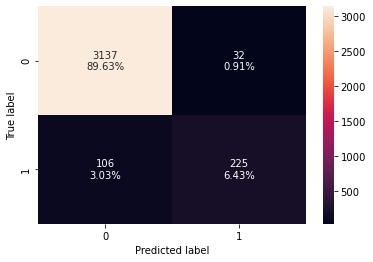

In [ ]:
confusion_matrix_sklearn_with_threshold(log_sfs, X_train_sfs, y_train)

In [ ]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_train_sfs, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


Accuracy    Recall  Precision        F1
0  0.960571  0.679758   0.875486  0.765306

* On test set

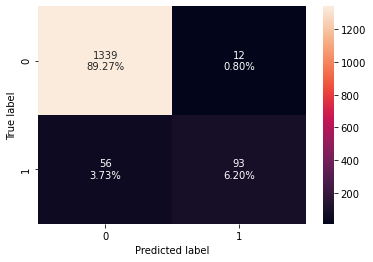

In [ ]:
confusion_matrix_sklearn_with_threshold(log_sfs, X_test_sfs, y_test)

In [ ]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_test_sfs, y_test
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0  0.954667  0.624161   0.885714  0.732283

The Recall is much less than after applying the feature selection with the default threshold 0.5 , hence we will derive another model with a threshold 0.1 and observe its performance

In [ ]:
log_reg_model_train_perf_SFS_tre = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_train_sfs, y_train,  threshold=0.1
)
print("Training performance:")
log_reg_model_train_perf_SFS_tre

Training performance:


Accuracy    Recall  Precision        F1
0     0.906  0.873112   0.501736  0.637266

In [ ]:
log_reg_model_test_perf_SFS_tre = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_test_sfs, y_test, threshold=0.1
)

print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0  0.954667  0.624161   0.885714  0.732283

The Recall of the train and test sets are highly mismatched, where recall train = 0.87 and recall test = 0.62

## Logistic Regression Models Comparison:

|Sr|Model name| train_performance |recall (train) |test_performance |recall(test)| threshold | no. of variables|
|:--:|:---------|:--------------------|:---------------|:------------|:------------:|:------------:|:------------:|
|1|lg|log_reg_model_train_perf|0.6798|log_reg_model_test_perf|0.6242| 0.5 |257|
|2|lg|log_reg_model_train_perf_threshold_auc_roc|0.8761|log_reg_model_test_perf_threshold_auc_roc|0.7919|0.187|257|
|3|lg|log_reg_model_train_perf_threshold_curve|0.9154|log_reg_model_test_perf_threshold_curve|0.8792|0.10|257|
|4|log_sfs|log_reg_model_train_perf_SFS|0.6798|log_reg_model_test_perf_SFS|0.6241|0.5|22|
|5|log_sfs|log_reg_model_train_perf_SFS_tre|0.8731|log_reg_model_test_perf_SFS_tre|0.6242|0.1|22|


Observation:
- The best performing model is **Model_3** lg model tuned to a **threshold of 0.1** and uses **257 variables**

Conclusion:
- The very low threshold yielding a good model predictibility is explained by the very low percentage of class 1 customers (who accept personal loan) in the original data set.
- This model will be used in the final comparison between Decision tree models


# Model building
## 2. Decision Tree

In addition to using the : The **get_recall_score** and **make_confusion_matrix** functions, we will define the function **plot_tree** to plot the decision trees for the models under study

In [ ]:
#function to plot a decision tree
def plot_tree(model, Predictor):
    feature_names = Predictor.columns.to_list()
    plt.figure(figsize=(20, 30))
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

### Building the original tree $T_0$

The starting point is building the original full tree model with the default hyperparameters and observe:
- Model performance
- Variables importance
- Model Improvement strategy 

Yet, It was noted that the frequence of classes in training set is:

|Class|Frequence|
|:---:|:-----:|
|0|0.905429|
|1|0.094571|  

To avoid ending up with a bias model, we should balance the class weights (using the class_weight hyperparamater) in the decision tree classifer.

In [ ]:
#creating the decission tree model
t_0 = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

In [ ]:
#fitting the training data
t_0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model performance Evaluation of $T_0$

In [ ]:
#Calculating the Recall for train and test data
Recall_Train_T_0 = get_recall_score(t_0, X_train, y_train)
print(f'Recall for T_0 on Train Data = {Recall_Train_T_0}')
Recall_Test_T_0 = get_recall_score(t_0, X_test, y_test)
print(f'Recall for T_0 on Test Data = {Recall_Test_T_0}')

Recall for T_0 on Train Data = 1.0
Recall for T_0 on Test Data = 0.8859060402684564


A quiet big mismatch is observed between train and test sets performance, hence it is assumed that the T_0 model is overfitting the data.
let us observe further the confusion matrix and the tree structure.

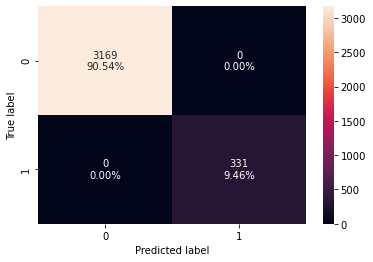

In [ ]:
confusion_matrix_sklearn(t_0, X_train, y_train)

As assumed, the model is perfectly overfitting the data as observed from the confusion matric the FN & FP are 0%

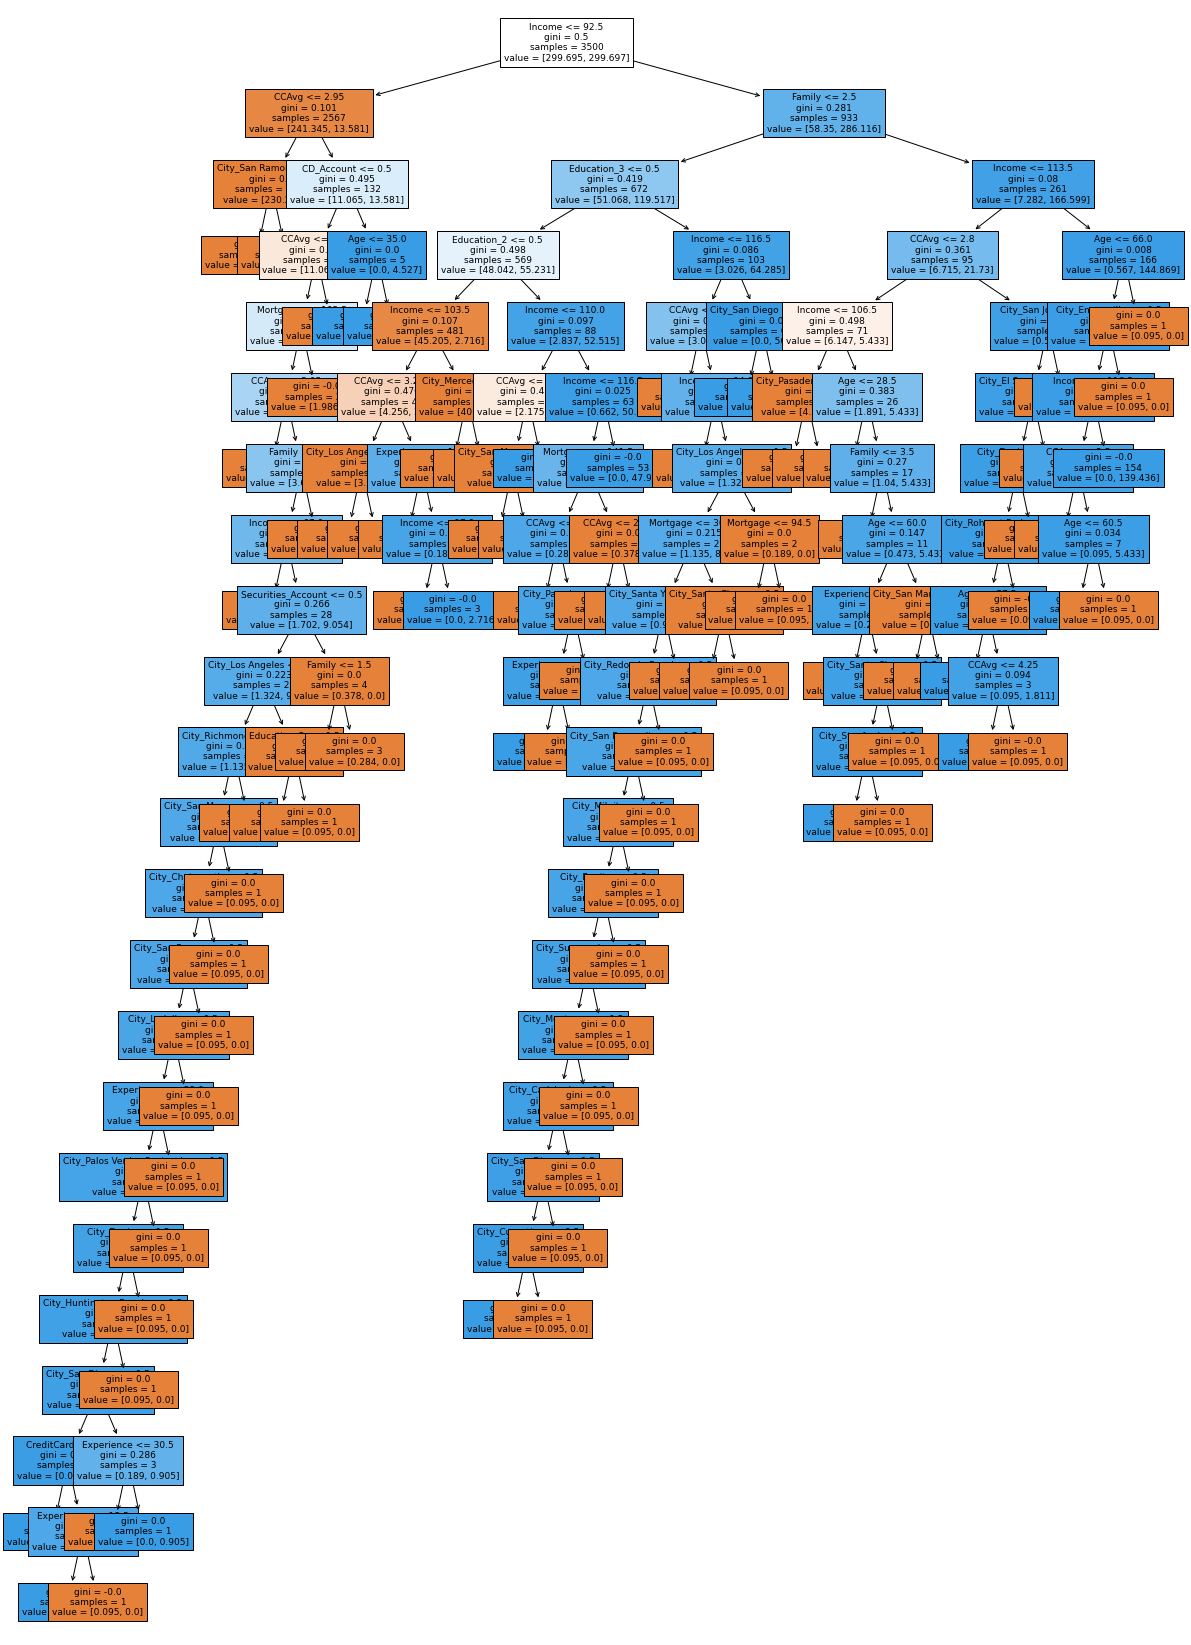

In [ ]:
#plotting the tree
plot_tree(t_0,X_train)

- The original tree $T_0$ is quiet complicated and is overfitting the training data set, hence pre-prunning and post proning are to be considered to improve the model performance.
- One very interesting observation still on $T_0$ is that the first split was on the "Income" variable, hence let us observe first how the variable importances look like

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

def view_nd_plot_importance(model, predictors):
    print("The features importances:")
    print(
        pd.DataFrame(
            model.feature_importances_, columns=["Imp"], index=predictors.columns
        ).sort_values(by="Imp", ascending=False)
    )

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 65))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [predictors.columns[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

The features importances:
                     Imp
Income          0.634087
Education_2     0.136399
CCAvg           0.090608
Education_3     0.048025
Family          0.045608
...                  ...
City_Inglewood  0.000000
City_Irvine     0.000000
City_La Mesa    0.000000
City_La Mirada  0.000000
State_CA        0.000000

[257 rows x 1 columns]


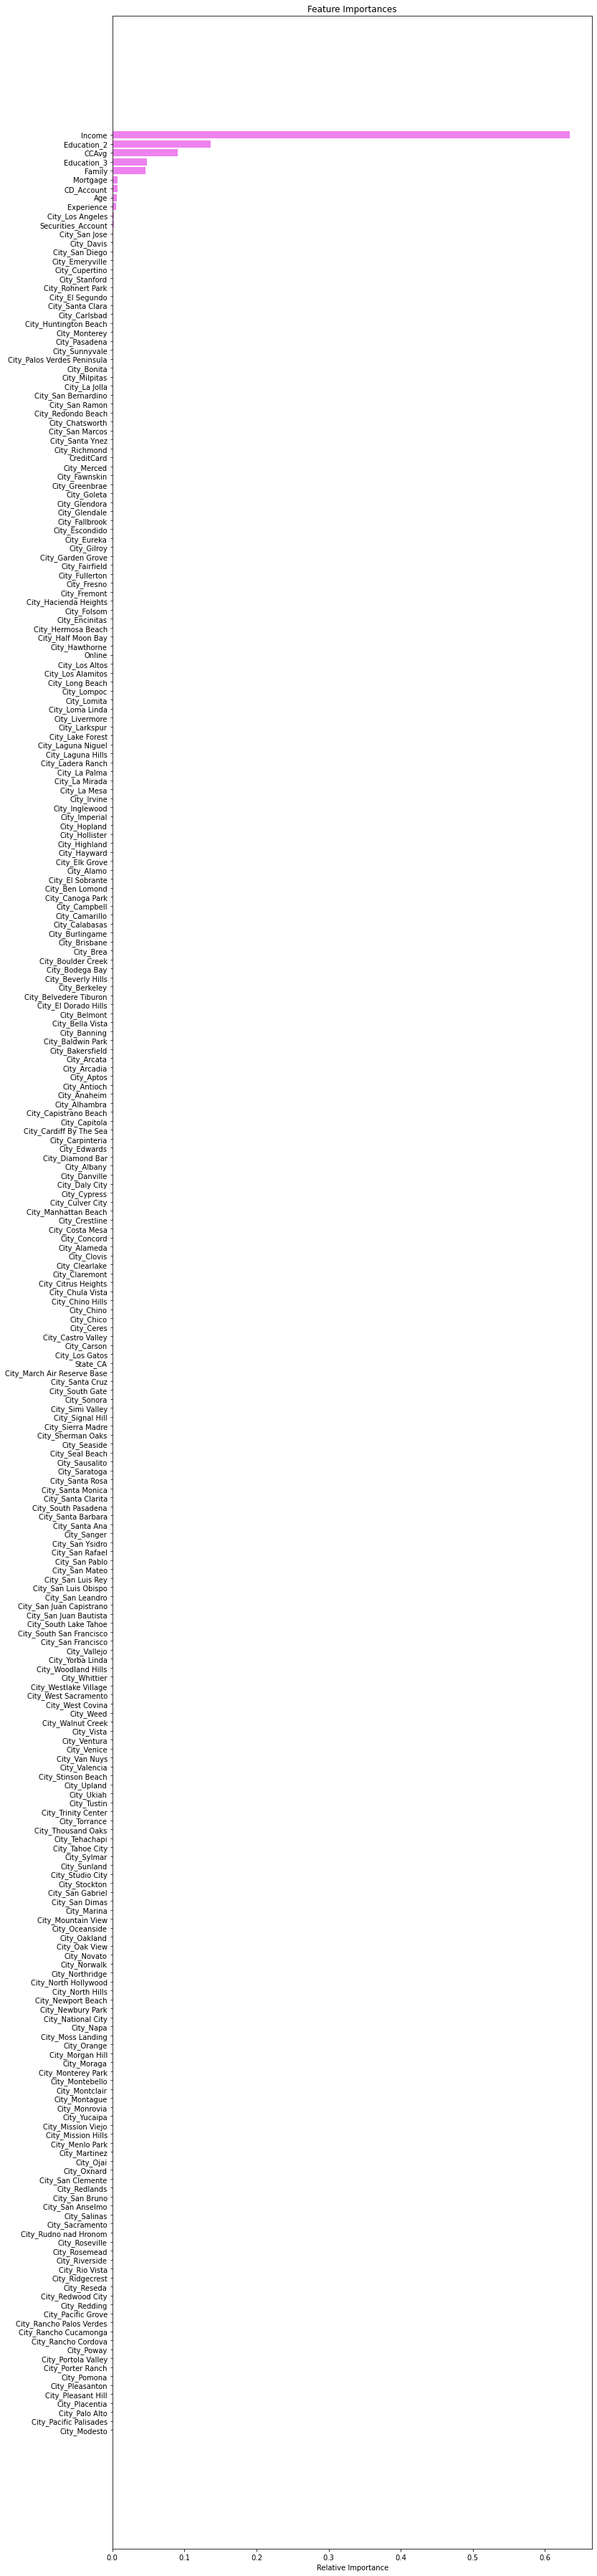

In [ ]:
view_nd_plot_importance(t_0, X_train)

- It is observed that the top importance variable is Income and the least importance are the cities (except for Los Angles that contributes slightly to the model predictibility)
- The top 5 variables are :
    - Income          
    - Education_2     
    - CCAvg           
    - Education_3     
    - Family          

## Model performance improvement

### 1. Pre-prunning via hyperparameter tuning 
The approach is: applying GridSearch to compute the optimum hyperparameter values


In [ ]:
#let us get the max depth of T_0 to have an idea how to tune our parameters
print(f'''The max depth of the t_0 =  {t_0.tree_.max_depth}
The node_count ={t_0.tree_.node_count}
The number of leaves = {t_0.tree_.n_leaves}''')

The max depth of the t_0 =  22
The node_count =171
The number of leaves = 86


In [ ]:
# Choose the type of classifier.
t_grid = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'max_leaf_nodes' : [2, 3, 5, 10],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(t_grid, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
t_grid = grid_obj.best_estimator_

# Fit the best algorithm to the data.
t_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=1)

### Applying the tuned hyperparamaters to derive T_1

Plugging in the hyper parameters:
- max_depth = 5
- Criteroion = Entropy
- remaining paramaters : Keep as default

In [ ]:
# Choose the type of classifier.
t_1 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429})

In [ ]:
t_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, random_state=1)

### Model Performance Evaluation_Pre-pruned Tree $T_1$

In [ ]:
Recall_Train_T_1 = get_recall_score(t_1, X_train, y_train)
print(f'Recall for T_1 on Train Data = {Recall_Train_T_1}')
Recall_Test_T_1 = get_recall_score(t_1, X_test, y_test)
print(f'Recall for T_1 on Test Data = {Recall_Test_T_1}')

Recall for T_1 on Train Data = 0.9909365558912386
Recall for T_1 on Test Data = 0.9530201342281879


Displaying the tree, the confucion matrix and variables importance

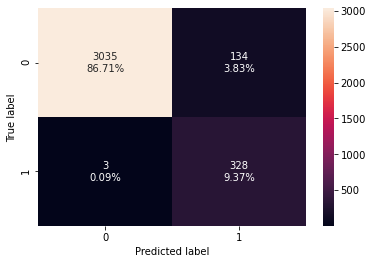

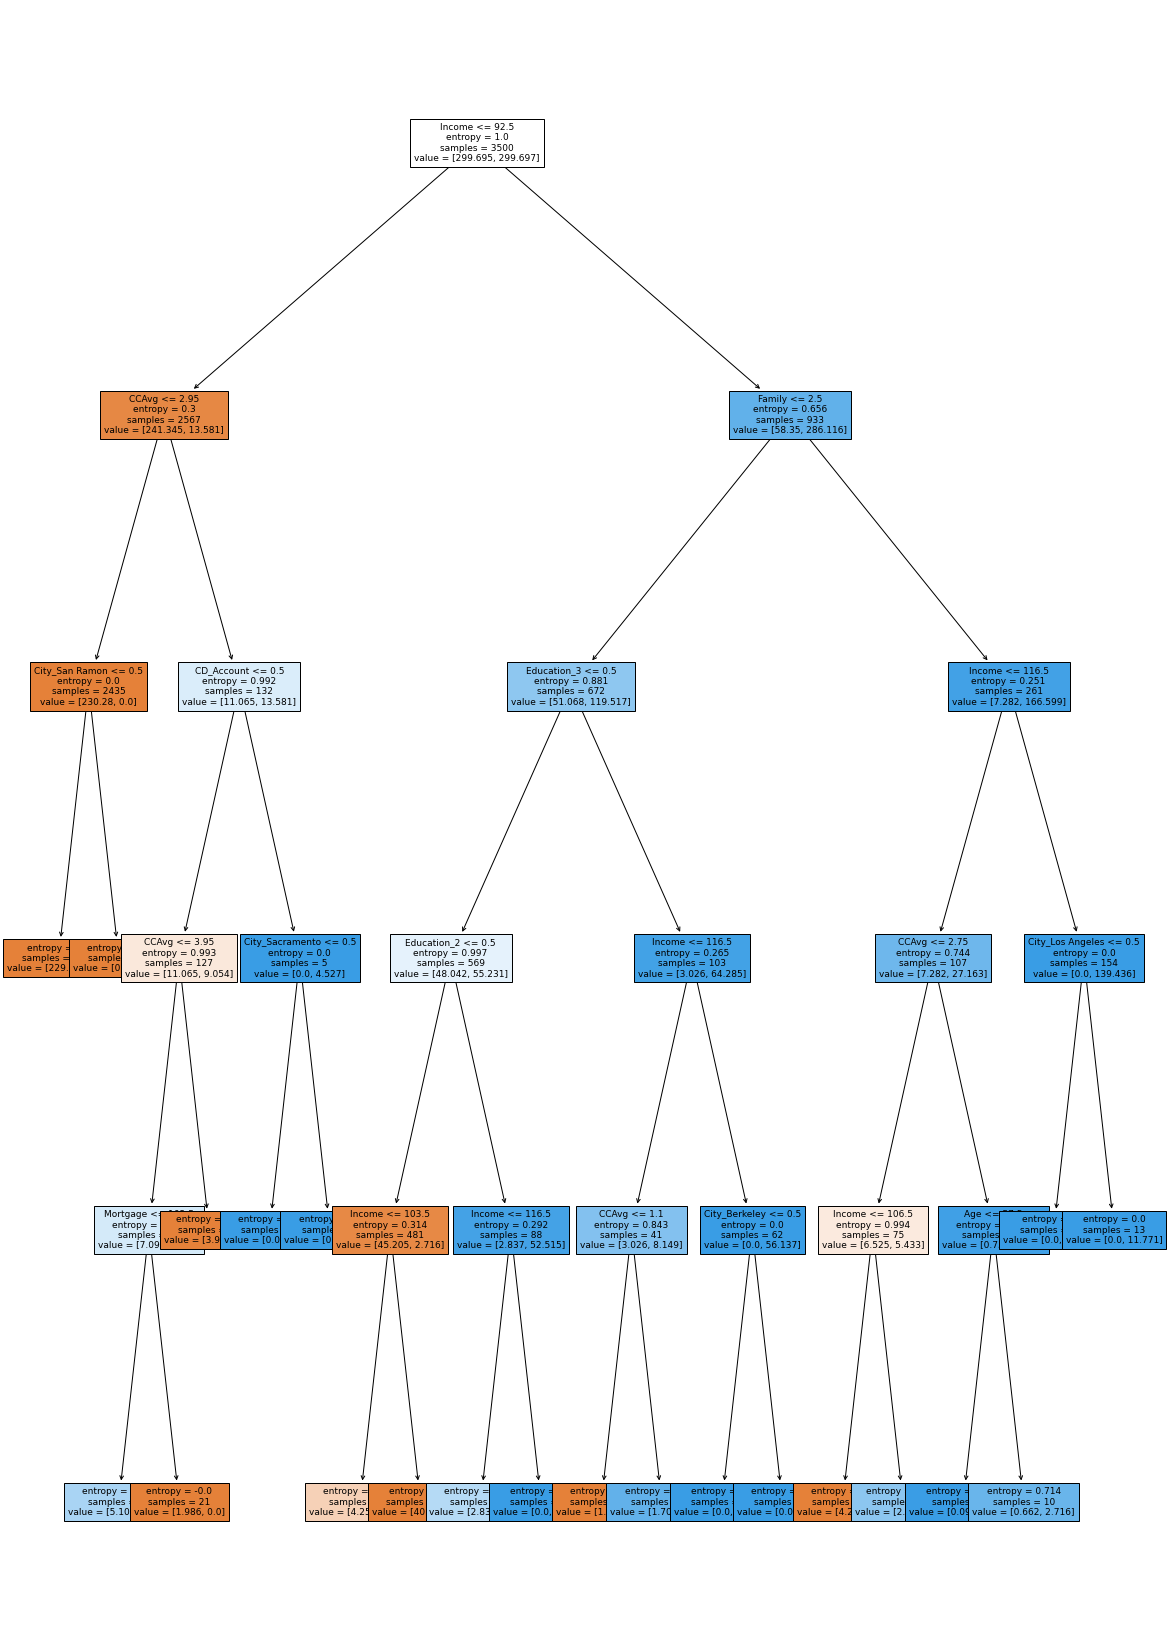

The features importances:
                            Imp
Income                 0.622152
Education_2            0.129053
CCAvg                  0.122196
Family                 0.058051
Education_3            0.053056
...                         ...
City_Hollister         0.000000
City_Hopland           0.000000
City_Huntington Beach  0.000000
City_Imperial          0.000000
State_CA               0.000000

[257 rows x 1 columns]


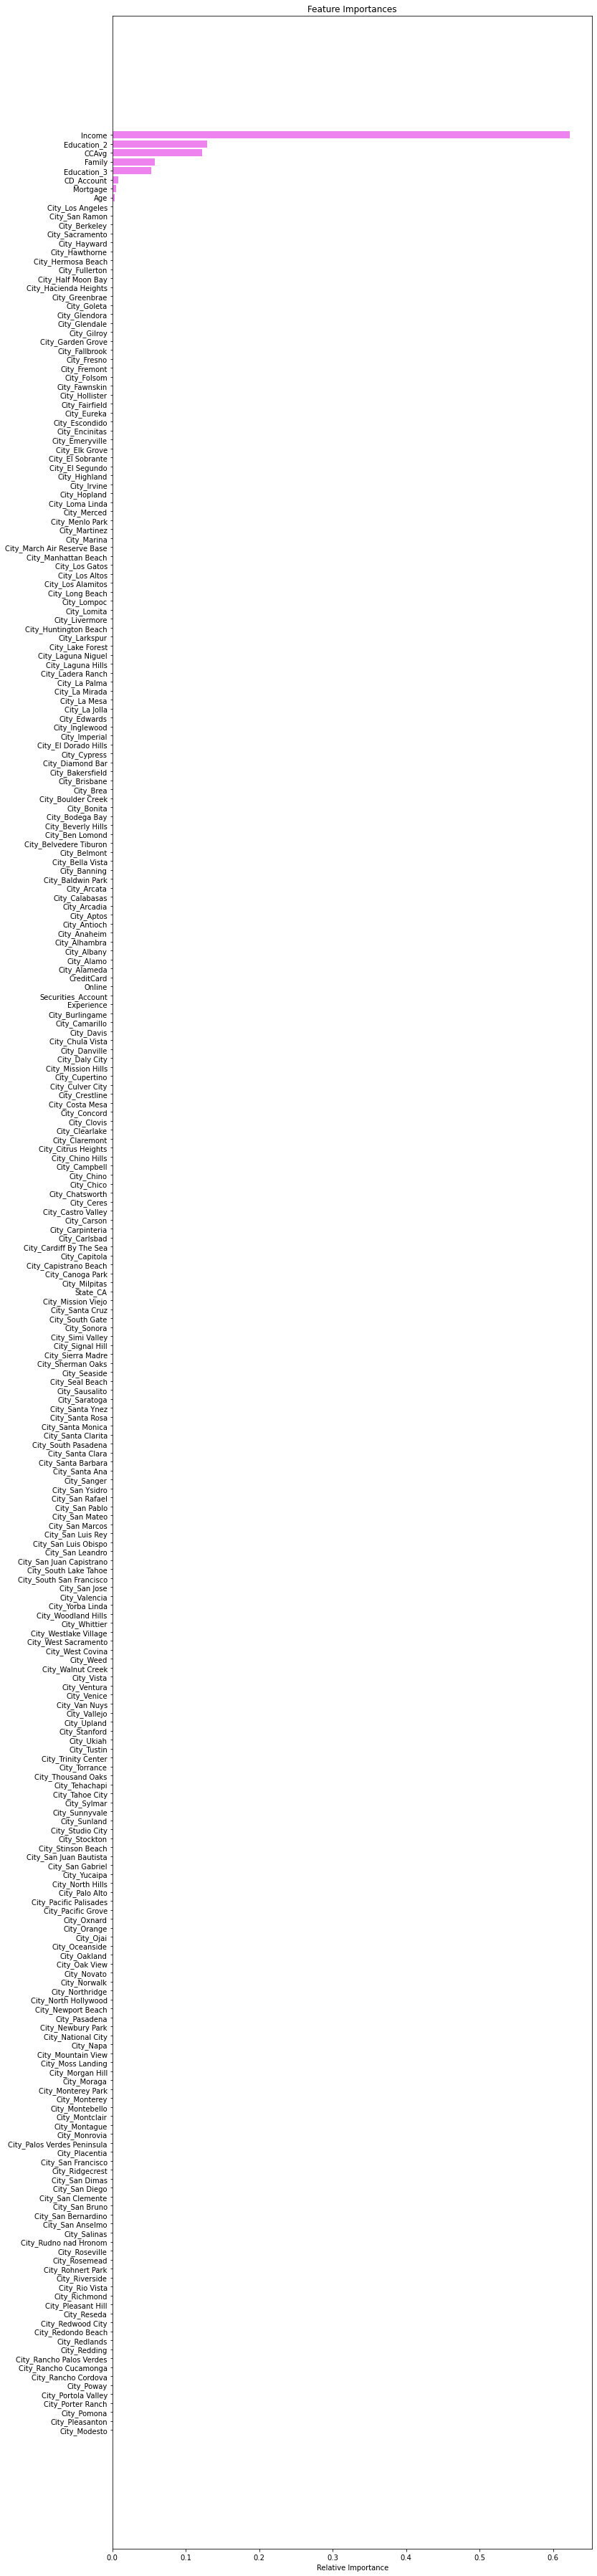

In [ ]:
confusion_matrix_sklearn(t_1, X_train, y_train)
plot_tree(t_1,X_train)
view_nd_plot_importance(t_1, X_train)

### **Observation**

- At **max_depth=5. criterion= entropy and  default values for the remaining hyperparameters** the model performance on the **test set** is better than at **$T_0$** at max_depth= None criterion = gini

- Recall values:
    - Recall for T_1 on Train Data = 0.9909365558912386
    - Recall for T_1 on Test Data = 0.9530201342281879
- Features with max importance:
    - Income                         6.221524e-01
    - Education_2                    1.290525e-01
- Less importance yet still having a predictibily effect:
    - CCAvg                          1.221962e-01
    - Family                         5.805141e-02
    - Education_3                    5.305620e-02
-Confusion matrix:
    - FN at 0.09%
    - FP at 3.83%


### Tuning further hyperparameters to derive model $T_2$

In [ ]:
#Choose the type of classifier.
t_2 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429},max_leaf_nodes=3,
                       min_impurity_decrease=1e-05)

In [ ]:
t_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=1)

### Model Performance Evaluation_Pre-pruned Tree $T_2$

In [ ]:
Recall_Train_T_2 = get_recall_score(t_2, X_train, y_train)
print(f'Recall for T_2 on Train Data = {Recall_Train_T_1}')
Recall_Test_T_1 = get_recall_score(t_2, X_test, y_test)
print(f'Recall for T_2 on Test Data = {Recall_Test_T_1}')

Recall for T_2 on Train Data = 0.9909365558912386
Recall for T_2 on Test Data = 1.0


The model seems to overfit the test data, hence it is not to be neglected

## Decision Tree Models Comparison (pre-pruning)

|Model name| train_performance |recall (train) |test_performance |recall(test)| Depth |Criterion|Other hyperparameters|
|:---------|:--------------------|:---------------|:------------|:------------:|:------------:|:------------:|:------------:|
|t_0|Recall_Train_T_0|1.0|Recall_Test_T_0|0.8859| None |Gini| Default|
|t_0|Recall_Train_T_1|0.9909|Recall_Test_T_1|0.9531|5 |Entropy|Default|
|t_2|Recall_Train_T_2|0.99|Recall_Test_T_2|1.0|5 |Entropy|max_leaf_nodes=3 & min_impurity_decrease=1e-05 |

   
### **Conclusion of Pre-prunning**
- The best performing model on the test set is <font color=green> **$T_1$** </font> with the below hyperparameters:
|Hyper parameter|Value|
|:--|:--:|
|criterion|entropy|
|max_depth|5|
|class_weight|{0: 0.094571, 1: 0.905429}|
|Others|Default Values

The feature importance of this model is:
- Features with max importance:
    - Income                         6.221524e-01
    - Education_2                    1.290525e-01
- Less importance yet still having a predictibily effect:
    - CCAvg                          1.221962e-01
    - Family                         5.805141e-02
    - Education_3                    5.305620e-02
    
#### <font color=green> End of Pre-prunning </font>


### Post Prunning

In [ ]:
#defining the classifier
PP_t_0 = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

#defining the cost complexity pryning path
path = PP_t_0.cost_complexity_pruning_path(X_train, y_train)

#Extracting the ccp_aplhas and impurities from the path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
#displaying the ccp_alphas VS the impurities to prove that as the alphase increas the impurities increase 
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -4.350045e-16
1   1.156114e-18 -4.338484e-16
2   1.541486e-18 -4.323069e-16
3   1.541486e-18 -4.307654e-16
4   1.541486e-18 -4.292239e-16
5   2.452364e-18 -4.267715e-16
6   3.082972e-18 -4.236886e-16
7   8.863544e-18 -4.148250e-16
8   1.418868e-17 -4.006363e-16
9   1.471418e-17 -3.859222e-16
10  2.851033e-17 -3.574118e-16
11  9.101774e-17 -2.663941e-16
12  9.358097e-17 -1.728131e-16
13  4.265362e-16  2.537231e-16
14  1.559680e-04  3.119360e-04
15  1.568678e-04  6.256717e-04
16  2.775440e-04  3.678655e-03
17  2.827427e-04  6.506082e-03
18  2.857137e-04  7.363223e-03
19  2.998944e-04  8.262906e-03
20  3.066188e-04  9.182763e-03
21  3.101569e-04  9.492920e-03
22  3.939483e-04  1.106871e-02
23  4.864491e-04  1.204161e-02
24  4.892742e-04  1.253089e-02
25  5.517629e-04  1.308265e-02
26  5.900272e-04  1.367268e-02
27  5.960439e-04  1.426872e-02
28  6.616421e-04  1.559200e-02
29  7.538156e-04  1.634582e-02
30  8.981795e-04  1.724400e-02
31  9.269284e-04  1.817093e-02
32  1.461813e-03  1.963274e-02
33  1.671122e-03  2.130386e-02
34  1.768018e-03  2.307188e-02
35  2.221376e-03  2.751463e-02
36  2.375812e-03  2.989044e-02
37  2.472653e-03  3.483575e-02
38  3.297255e-03  3.813301e-02
39  3.344501e-03  4.147751e-02
40  3.503779e-03  4.498129e-02
41  3.602943e-03  5.218717e-02
42  3.729680e-03  5.591685e-02
43  4.941464e-03  6.085831e-02
44  4.970964e-03  7.080024e-02
45  2.255802e-02  9.335827e-02
46  3.708743e-02  2.046206e-01
47  2.953794e-01  5.000000e-01

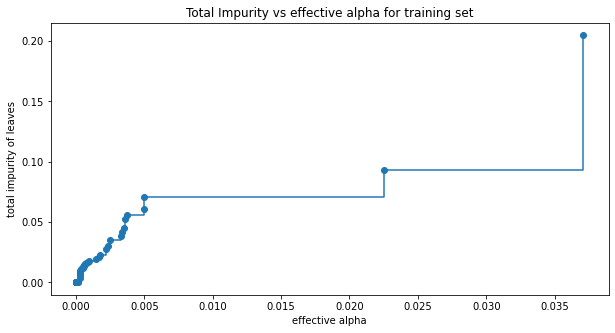

In [ ]:
#let us plot the alphas VS the impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

It is observed that the impurities show a sdeen peak after alpha = approx.0.005

Let us start training the decision tree using the effective alphas and observe how the tree depth vary with alpha

In [ ]:
#an emplty list of post pruned trees (PP_trees)

PP_trees = []
for alpha in ccp_alphas:
    PP_tree = DecisionTreeClassifier(
        random_state=1, ccp_alpha=alpha, class_weight={0: 0.094571, 1: 0.905429}
    )
    PP_tree.fit(X_train, y_train)
    PP_trees.append(PP_tree)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        PP_trees[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953794476658226


We will Remove the last elements in PP_trees and CCP_alphas as they relfect the smallest tree (one node) and proceed with the visualtization of the nodes and depth (i.e tree complexity) as alpha varies

In [ ]:
PP_trees = PP_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

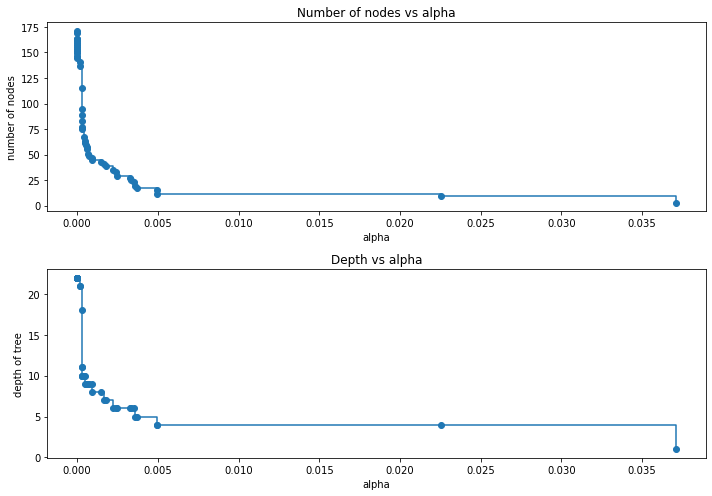

In [ ]:
node_counts = [PP_tree.tree_.node_count for PP_tree in PP_trees]
depth = [PP_tree.tree_.max_depth for PP_tree in PP_trees]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

It is observed that again at alpha = 0.005 the tree seems to have reached the smallest size which is underfitting the data. Hence, we now have an idea that the **alpha value that will give us the optimum model performance is definitely below 0.05**

Now, let us observe how the Model recall values at varying alphas for the training and test sets

In [ ]:
#derive the recall values for all PP_tress for the train set
recall_train = []
for PP_tree in PP_trees:
    y_pred_train = PP_tree.predict(X_train)
    values_train = recall_score(y_train, y_pred_train)
    recall_train.append(values_train)

In [ ]:
#derive the recall values for all PP_tress for the test set
recall_test = []
for PP_tree in PP_trees:
    y_pred_test = PP_tree.predict(X_test)
    values_test = recall_score(y_test, y_pred_test)
    recall_test.append(values_test)

In [ ]:
#calculating the Accuracy of test and train models
train_scores = [PP_tree.score(X_train, y_train) for PP_tree in PP_trees]
test_scores = [PP_tree.score(X_test, y_test) for PP_tree in PP_trees]

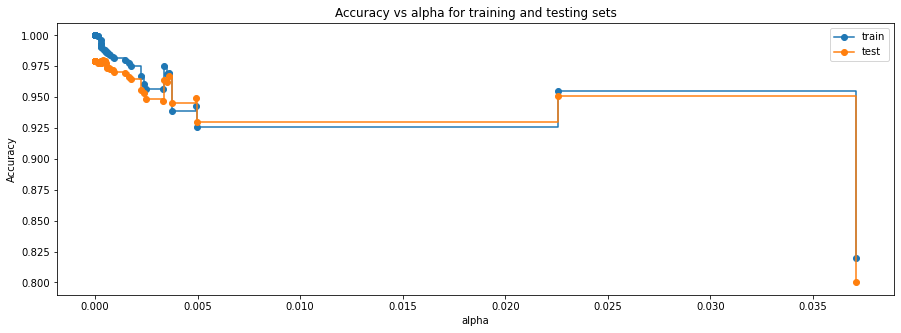

In [ ]:
#plotting the accuracy for test and training sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Again, we observe a better performance at alpha less than 0.05. Visually the value of alpha giving the best accuract is either very close to zero which could be still reflecting an over fitting tree, the other option is at approx 0.03 or 0.035. Still, the accuracy is not the optimum performance measure we are pursuing, we are to pursue the best Recall value as a performance measure

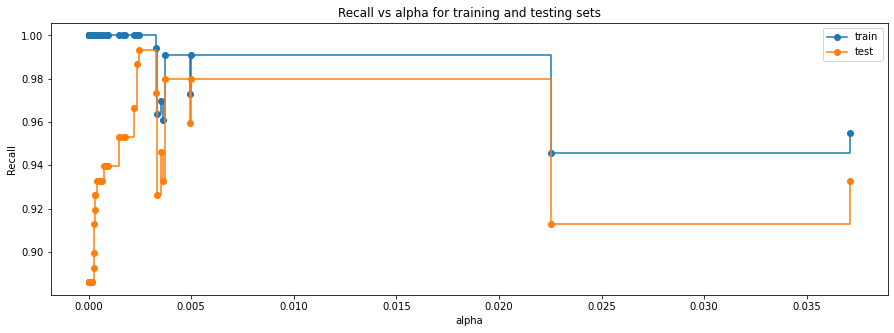

In [ ]:
#plotting the recall scores for test and training sets VS Alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#let us derive the minimum alpha value for the test test
index_best_model = np.argmax(recall_test)
print(f''' The recall value giving the best predictibility model is: {recall_test[index_best_model]}
"The best alpha value is: {ccp_alphas[index_best_model]}"''')

 The recall value giving the best predictibility model is: 0.9932885906040269
"The best alpha value is: 0.002472652743953624"


Deriving the best model **PP_t_best** and fitting it to the train set

In [ ]:
PP_t_best_1 = PP_trees[index_best_model]
PP_t_best_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002472652743953624,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model Performance Evaluation_Post-pruned Tree 

In [ ]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_1 = get_recall_score(PP_t_best_1, X_train, y_train)
print(f'Recall for PP_t_best_1 on Train Data = {Recall_Train_PP_t_best_1}')

Recall_Test_PP_t_best_1 = get_recall_score(PP_t_best_1, X_test, y_test)
print(f'Recall for PP_t_best_1 on Test Data = {Recall_Test_PP_t_best_1}')

Recall for PP_t_best_1 on Train Data = 1.0
Recall for PP_t_best_1 on Test Data = 0.9932885906040269


The Recall on train data sets is 1.0 which raises the suspicion of an overfitting model, yet its value is closer to the recall of the test dataset which is still better than t_0, yer requires further improvement.
Hence, we will derive the tree, decision table and feature importantce for this model **PP_t_best_1** and then derive another model of the second peak of alpha.

The tree depth is : 6


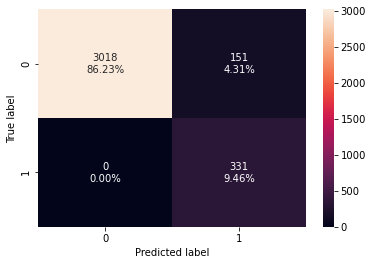

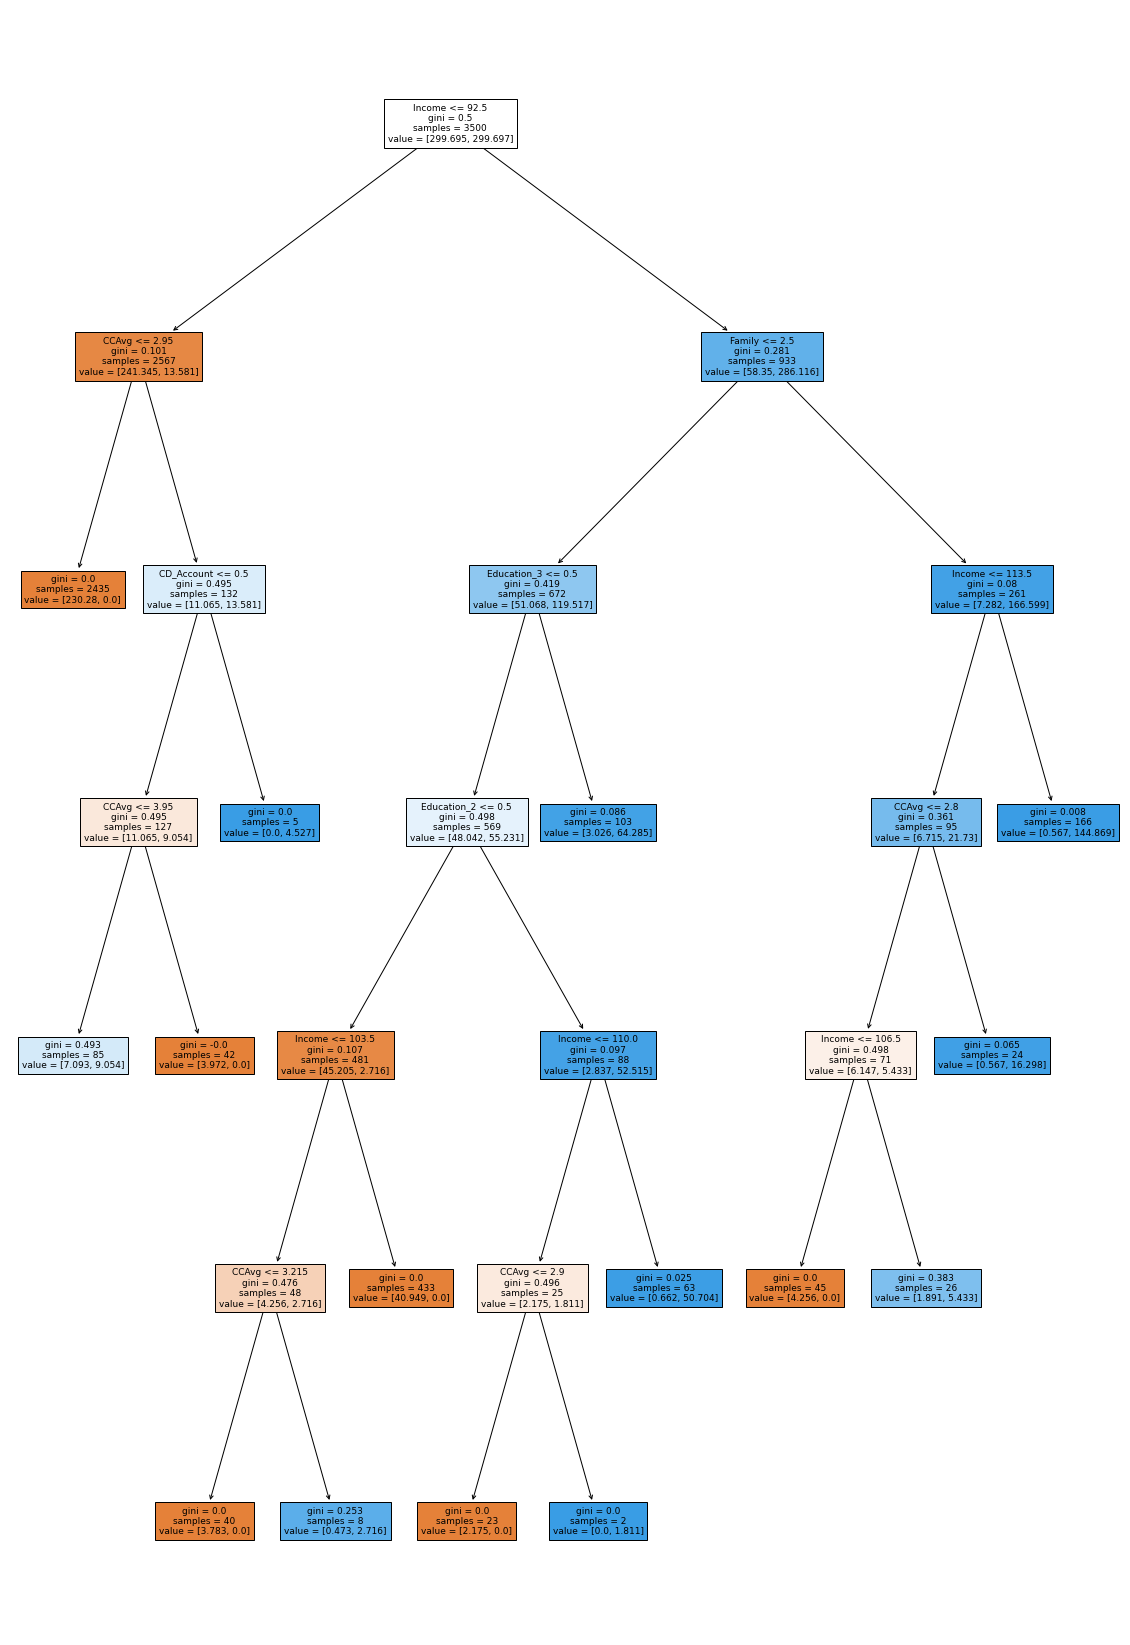

The features importances:
                            Imp
Income                 0.668840
Education_2            0.146614
CCAvg                  0.083952
Education_3            0.051622
Family                 0.040953
...                         ...
City_Highland          0.000000
City_Hollister         0.000000
City_Hopland           0.000000
City_Huntington Beach  0.000000
State_CA               0.000000

[257 rows x 1 columns]


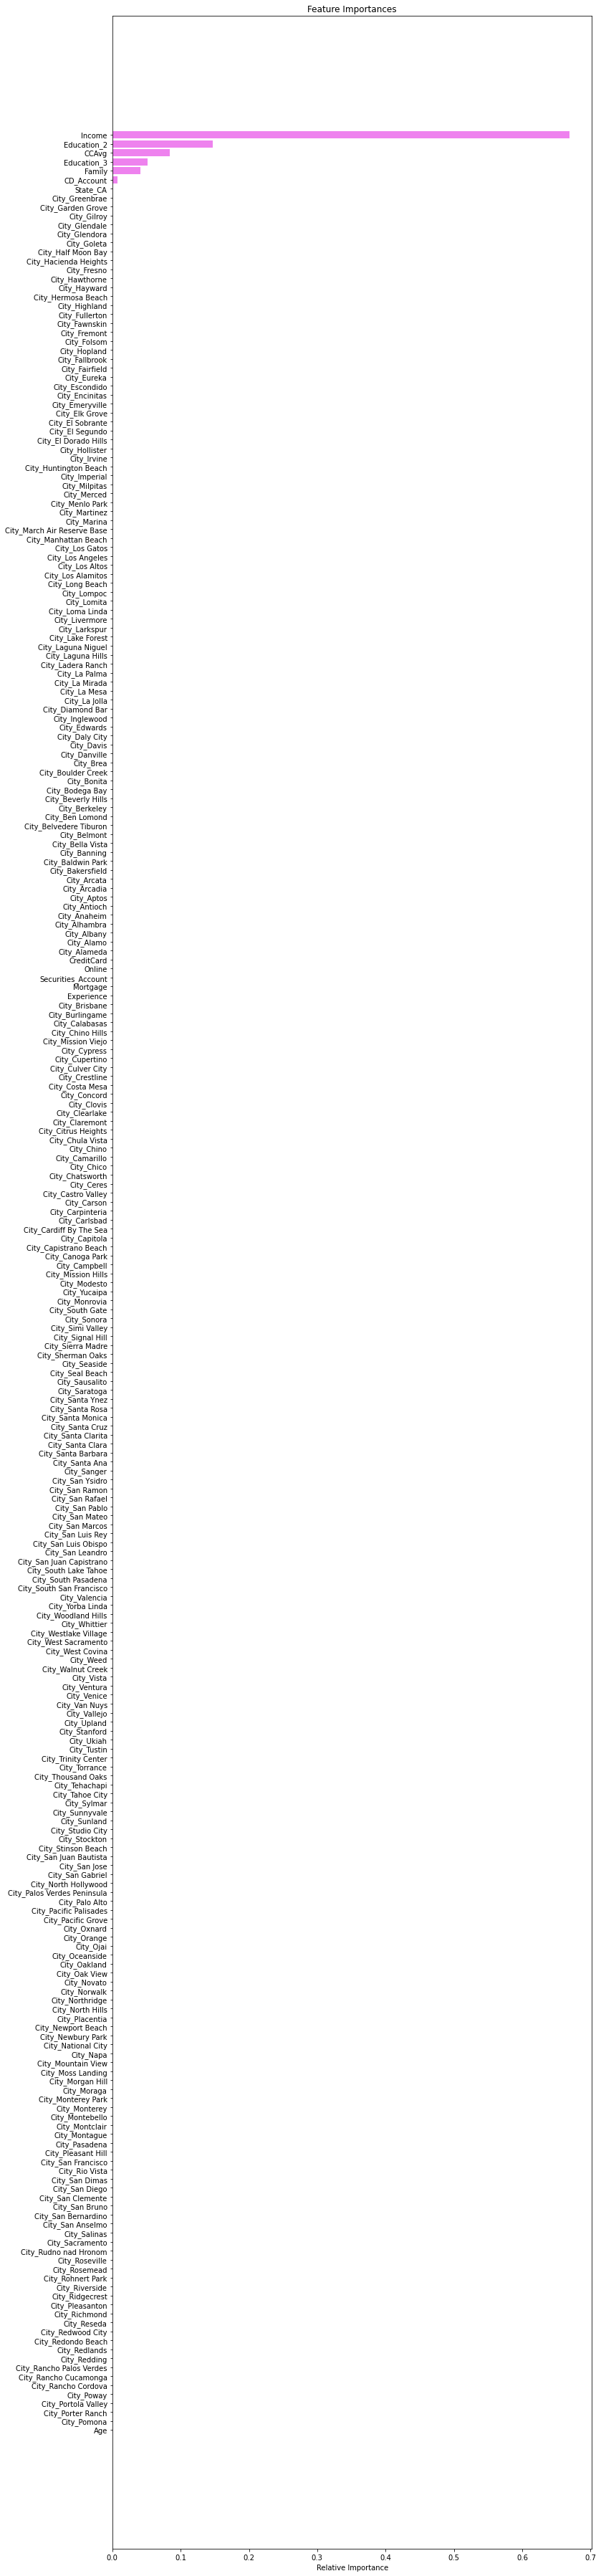

In [ ]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_1.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_1, X_train, y_train)
plot_tree(PP_t_best_1,X_train)
view_nd_plot_importance(PP_t_best_1, X_train)

### Observation on PP_t_best_1 Model 

- At **ccp_alpha=0.00247265274395358 and max_depth=6** the performance summary is:

- Recall values:
    - Recall for PP_t_best_1 on Train Data = 1.0
    - Recall for PP_t_best_1 on Test Data = 0.9932885906040269
- Features with max importance:
    - Income                         
    - Education_2                    
- Less importance yet still having a predictibily effect:
    - CCAvg                          
    - Education_3                    
    - Family                        

- Confusion matrix:
    - FN at 0.00% (*Not realistic*)
    - FP at 4.31%


## Further model enhancement by deriving PP_t_best_2 Model
Earlier when we viewed the Recall_test and Recall_train VS the alpha, it was noticed another meeting point at an alpha near value of approx 0.03. Hence, our approach to avoid using an overfitting model is to extract a higher alpha that still gives a very good Recall value for the test set.

In [ ]:
#creating a data frame including alpha, recall train and recall test
df = pd.DataFrame()
df[['ccp_alphas', 'recall_train', 'recall_test']]=''
df['ccp_alphas']=ccp_alphas
df['recall_train']= recall_train
df['recall_test']=recall_test
df

ccp_alphas  recall_train  recall_test
0   0.000000e+00      1.000000     0.885906
1   1.156114e-18      1.000000     0.885906
2   1.541486e-18      1.000000     0.885906
3   1.541486e-18      1.000000     0.885906
4   1.541486e-18      1.000000     0.885906
5   2.452364e-18      1.000000     0.885906
6   3.082972e-18      1.000000     0.885906
7   8.863544e-18      1.000000     0.885906
8   1.418868e-17      1.000000     0.885906
9   1.471418e-17      1.000000     0.885906
10  2.851033e-17      1.000000     0.885906
11  9.101774e-17      1.000000     0.885906
12  9.358097e-17      1.000000     0.885906
13  4.265362e-16      1.000000     0.885906
14  1.559680e-04      1.000000     0.885906
15  1.568678e-04      1.000000     0.885906
16  2.775440e-04      1.000000     0.892617
17  2.827427e-04      1.000000     0.899329
18  2.857137e-04      1.000000     0.912752
19  2.998944e-04      1.000000     0.919463
20  3.066188e-04      1.000000     0.926174
21  3.101569e-04      1.000000     0.926174
22  3.939483e-04      1.000000     0.932886
23  4.864491e-04      1.000000     0.932886
24  4.892742e-04      1.000000     0.932886
25  5.517629e-04      1.000000     0.932886
26  5.900272e-04      1.000000     0.932886
27  5.960439e-04      1.000000     0.932886
28  6.616421e-04      1.000000     0.932886
29  7.538156e-04      1.000000     0.939597
30  8.981795e-04      1.000000     0.939597
31  9.269284e-04      1.000000     0.939597
32  1.461813e-03      1.000000     0.953020
33  1.671122e-03      1.000000     0.953020
34  1.768018e-03      1.000000     0.953020
35  2.221376e-03      1.000000     0.966443
36  2.375812e-03      1.000000     0.986577
37  2.472653e-03      1.000000     0.993289
38  3.297255e-03      0.993958     0.973154
39  3.344501e-03      0.963746     0.926174
40  3.503779e-03      0.969789     0.946309
41  3.602943e-03      0.960725     0.932886
42  3.729680e-03      0.990937     0.979866
43  4.941464e-03      0.972810     0.959732
44  4.970964e-03      0.990937     0.979866
45  2.255802e-02      0.945619     0.912752
46  3.708743e-02      0.954683     0.932886

At row 42 it is noticed good recall values for train and test sets at a value of alpha near the 0.003 threshold noticed on the curve. This value seems a good fit as it is not too close to an underfitting model, hence we will extract this value and observe how it behaves on the tree and confusion matrix

In [ ]:
df.iloc[42]

ccp_alphas      0.003730
recall_train    0.990937
recall_test     0.979866
Name: 42, dtype: float64

In [ ]:
#extracting the model from the 42nd model and fitting it to train and test data
PP_t_best_2 = PP_trees[42]
PP_t_best_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0037296801618502892,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model Performance Evaluation of Post-pruned Tree *PP_t_best_2*

In [ ]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_2 = get_recall_score(PP_t_best_2, X_train, y_train)
print(f'Recall for PP_t_best_2 on Train Data = {Recall_Train_PP_t_best_2}')

Recall_Test_PP_t_best_2 = get_recall_score(PP_t_best_2, X_test, y_test)
print(f'Recall for PP_t_best_2 on Test Data = {get_recall_score(PP_t_best_2, X_test, y_test)}')

Recall for PP_t_best_2 on Train Data = 0.9909365558912386
Recall for PP_t_best_2 on Test Data = 0.9798657718120806


The Recall on test and train data sets are the same as stated in the dataframe df which was expected, let us move forward to visualizing the tree, the confusion matrix and feature importance

The tree depth is : 5


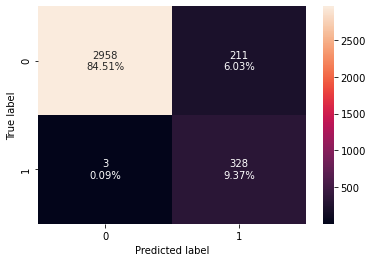

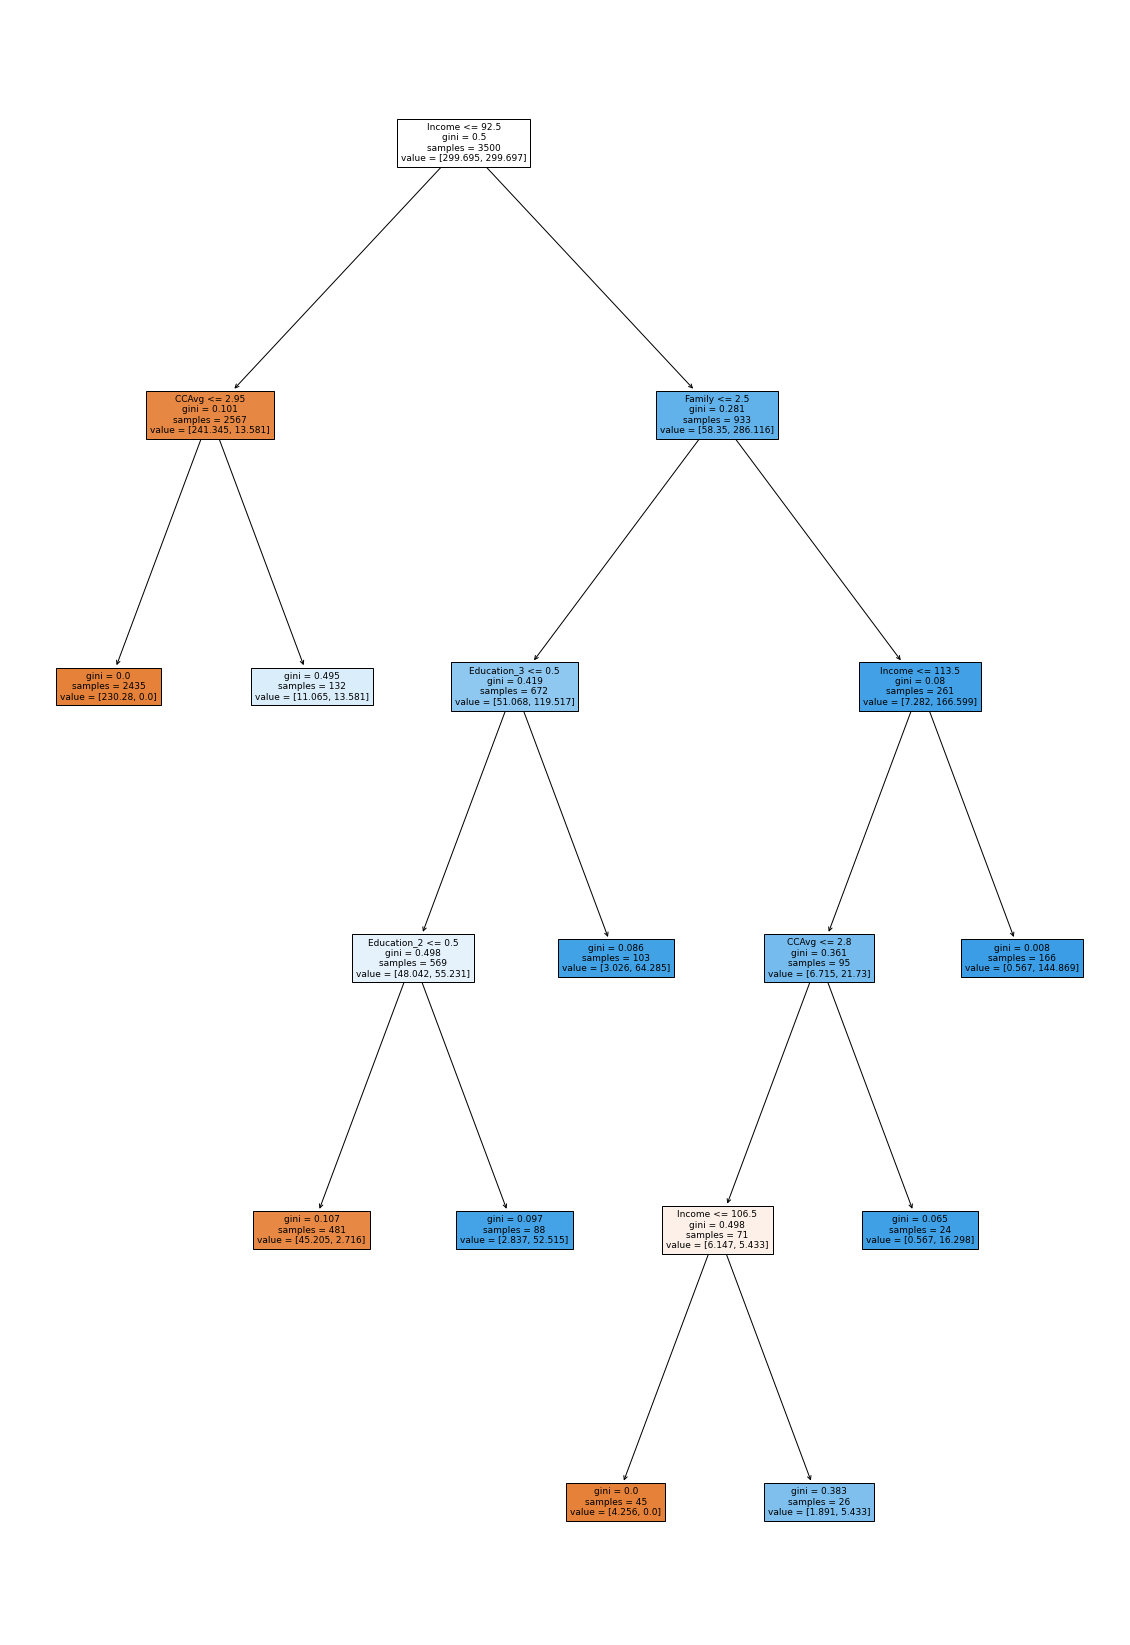

The features importances:
                         Imp
Income              0.685906
Education_2         0.153574
CCAvg               0.063550
Education_3         0.054072
Family              0.042897
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
State_CA            0.000000

[257 rows x 1 columns]


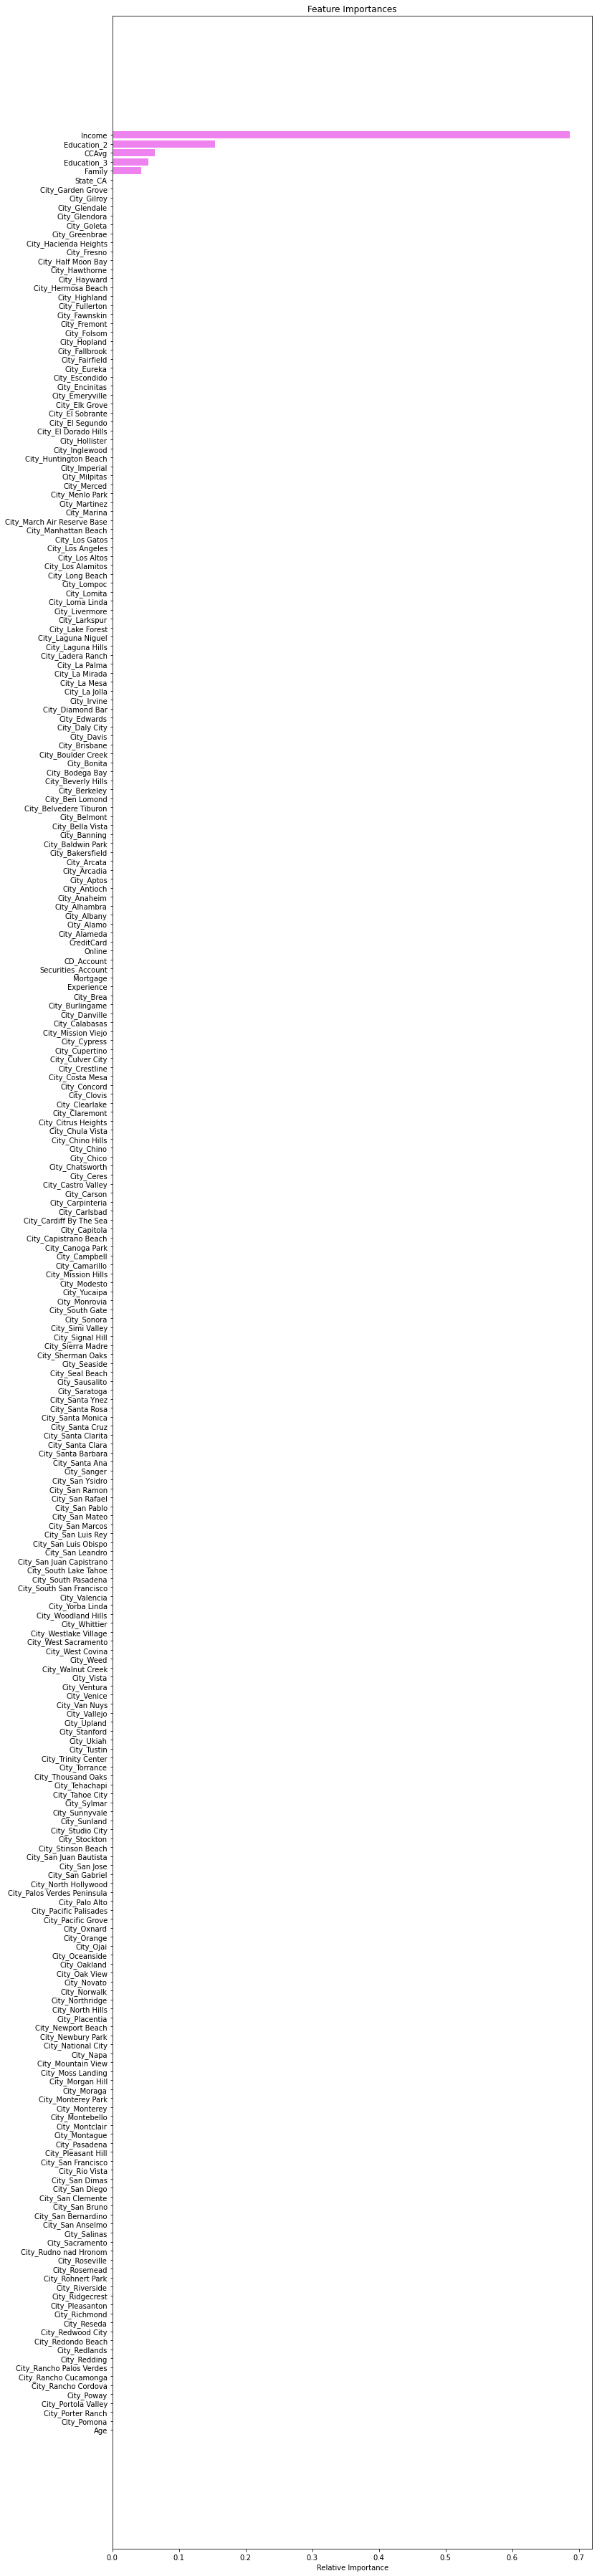

In [ ]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_2.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_2, X_train, y_train)
plot_tree(PP_t_best_2,X_train)
view_nd_plot_importance(PP_t_best_2, X_train)

### Observation on PP_t_best_2 Model

- At **ccp_alpha=0.003504 and max_depth=6** the performance of **PP_t_best_2** is better then **PP_t_best_1**. Although the recall values for train and test are less, the FN% in the confusion matrix is down to half. The performance summary is:

- Recall values:
    - Recall for PP_t_best_2 on Train Data = 0.9697885196374623
    - Recall for PP_t_best_2 on Test Data = 0.9463087248322147
- Features with max importance:
    - Income                         0.676053
    - Education_2                    0.149883
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.071228
    - Education_3                    0.052773
    - Family                         0.041866

- Confusion matrix:
    - FN at 0.29%
    - FP at 2.83%

### Model Performance Evaluation_Post-pruned Tree PP_t_best_3

In [ ]:
df.iloc[44]

ccp_alphas      0.004971
recall_train    0.990937
recall_test     0.979866
Name: 44, dtype: float64

In [ ]:
#extracting the model from the 42nd model and fitting it to train and test data
PP_t_best_3 = PP_trees[44]
PP_t_best_3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004970964209303446,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

In [ ]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_3 = get_recall_score(PP_t_best_3, X_train, y_train)
print(f'Recall for PP_t_best_3 on Train Data = {Recall_Train_PP_t_best_3}')
Recall_Test_PP_t_best_3 = get_recall_score(PP_t_best_3, X_test, y_test)
print(f'Recall for PP_t_best_3 on Test Data = {Recall_Test_PP_t_best_3}')

Recall for PP_t_best_3 on Train Data = 0.9909365558912386
Recall for PP_t_best_3 on Test Data = 0.9798657718120806


The Recall on test and train data sets are the same as stated in the dataframe df which was expected, let us move forward to visualizing the tree, the confusion matrix and feature importance

The tree depth is : 4


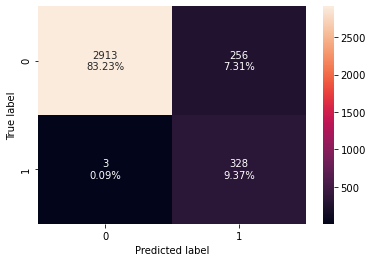

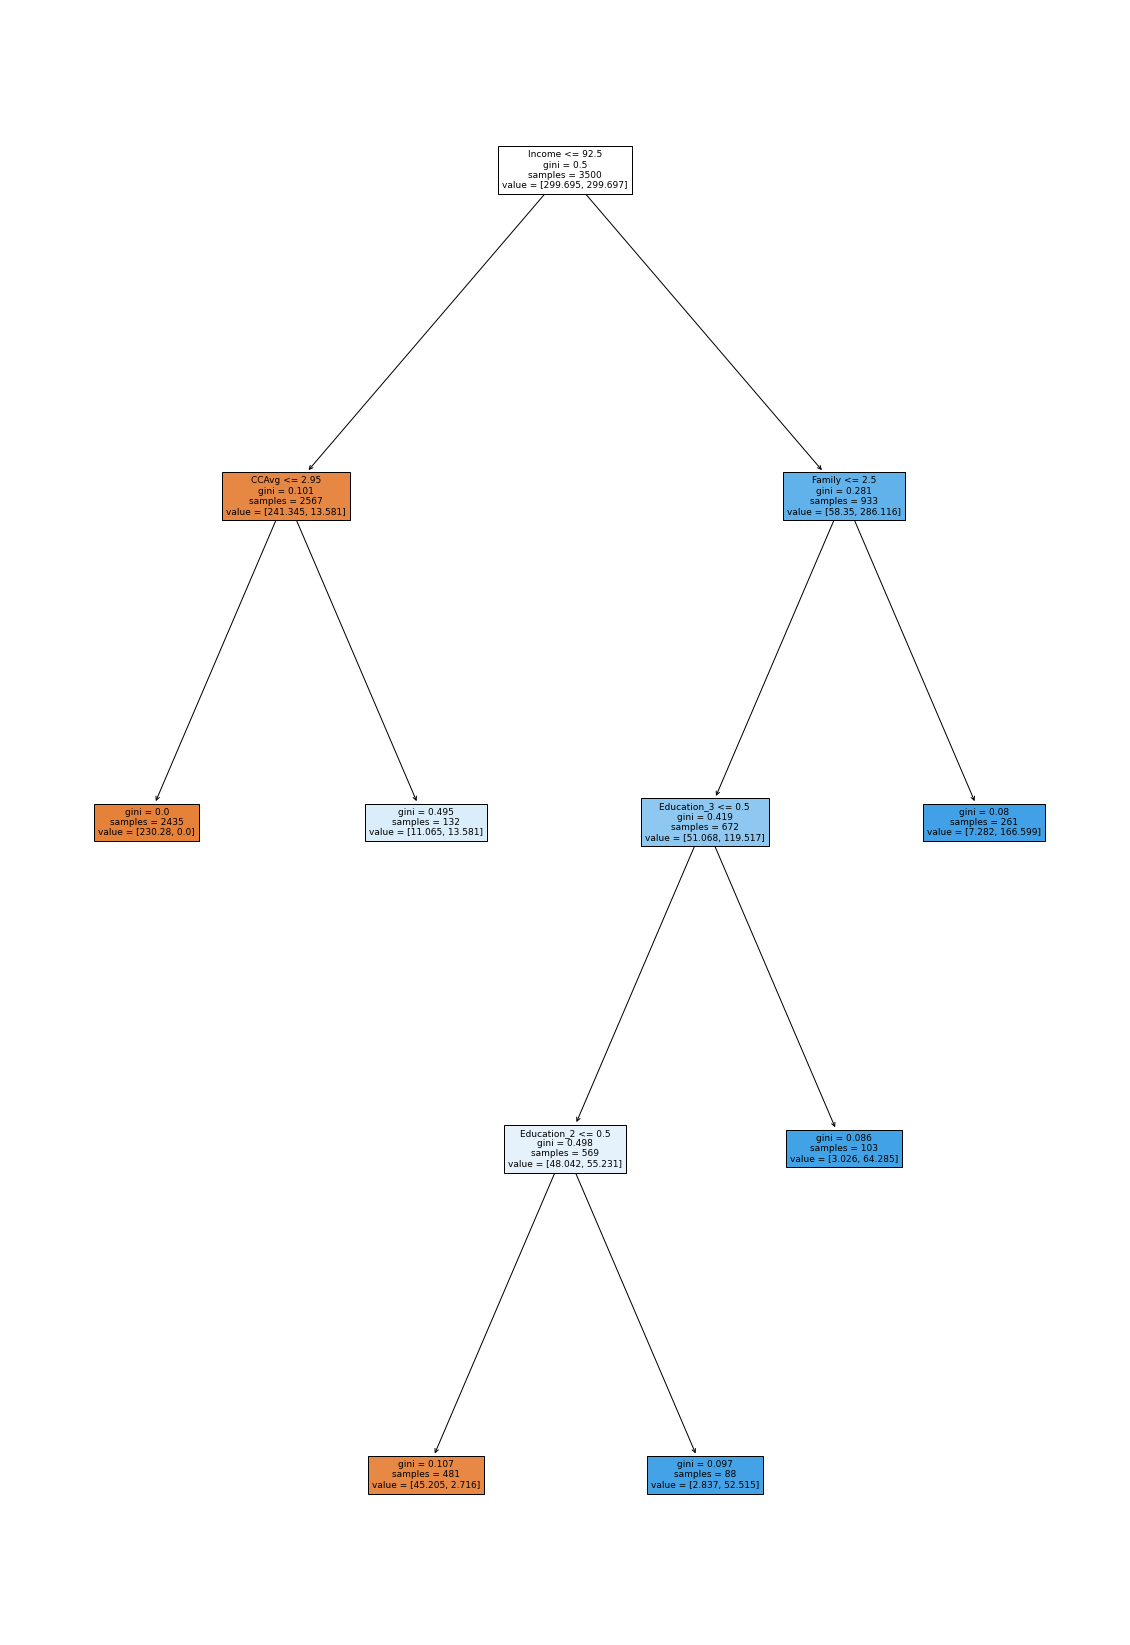

The features importances:
                         Imp
Income              0.688210
Education_2         0.158899
Education_3         0.055948
CCAvg               0.052558
Family              0.044385
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
State_CA            0.000000

[257 rows x 1 columns]


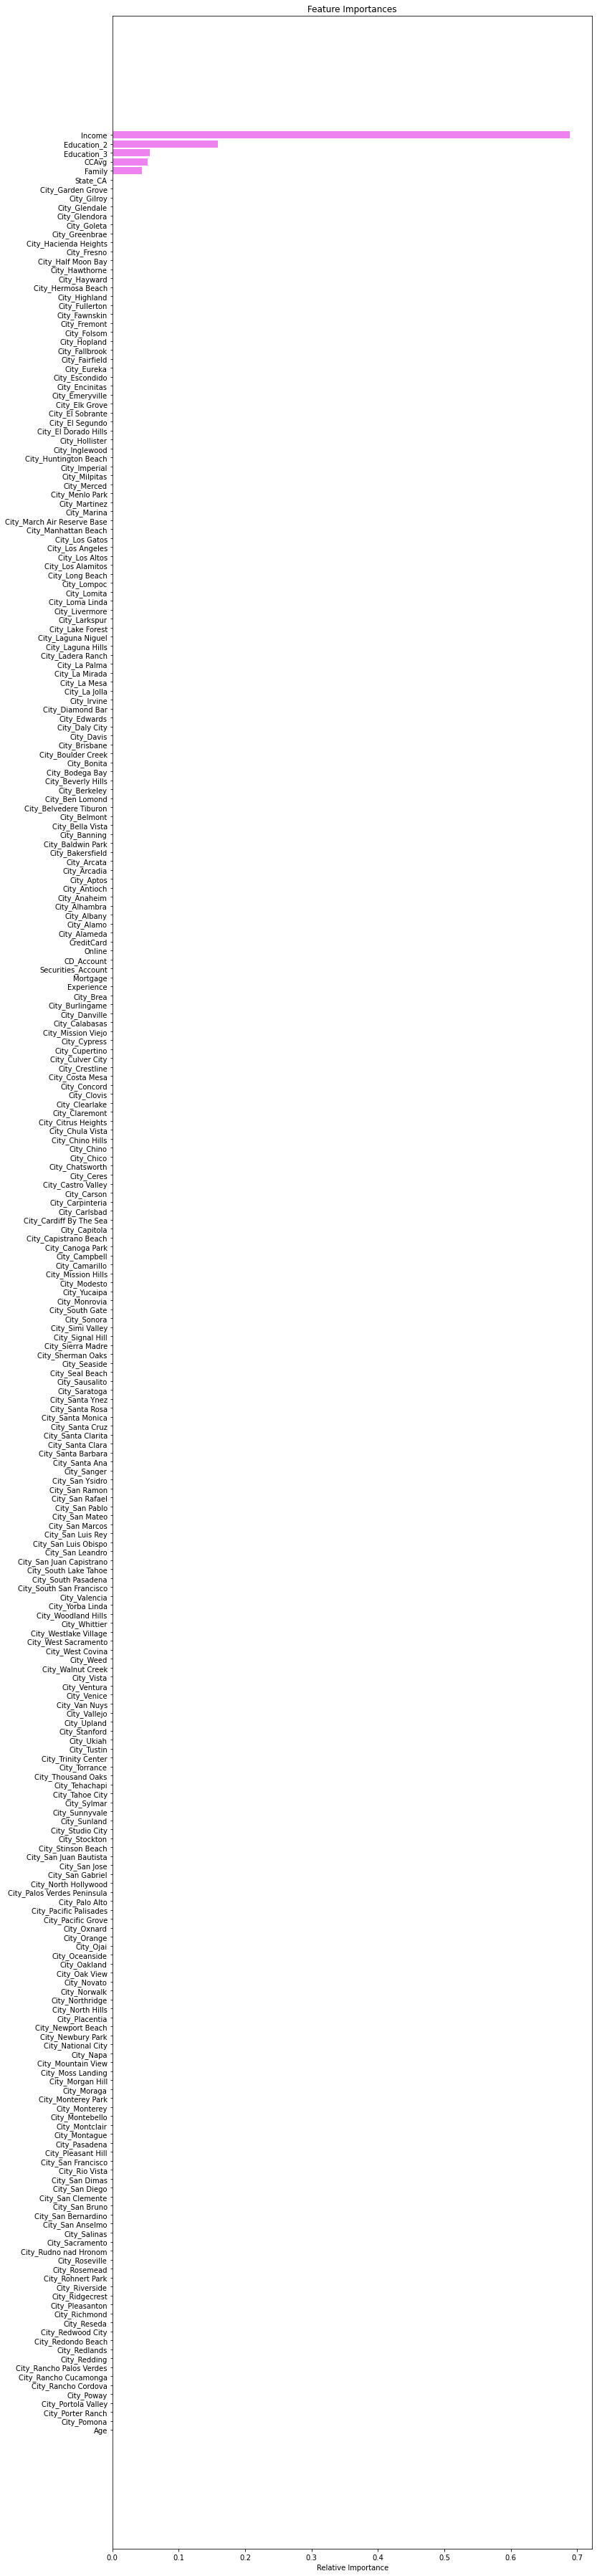

In [ ]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_3.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_3, X_train, y_train)
plot_tree(PP_t_best_3,X_train)
view_nd_plot_importance(PP_t_best_3, X_train)

### Observation on PP_t_best_3 Model

- At **ccp_alpha=0.0.003730 and max_depth=5** the performance of **PP_t_best_3** is better then **PP_t_best_2**. Although the recall values for train and test are less, the FN% in the confusion matrix is down to half. The performance summary is:

- Recall values:
    - Recall for PP_t_best_3 on Train Data = 0.9909365558912386
    - Recall for PP_t_best_3 on Test Data = 0.9798657718120806
- Features with max importance:
    - Income                         0.685906
    - Education_2                    0.153574
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.063550
    - Education_3                    0.054072
    - Family                         0.042897

- Confusion matrix:
    - FN at 0.09%
    - FP at 6.03%
    


## Decision Tree Models (post-pruning)

|Model name|train_performance|recall (train)|test_performance|recall(test)|ccp_alpha|
|:--:|:--:|:--|:--|:--:|:--|
|PP_t_best_1|Recall_Train_PP_t_best_1|1.0|Recall_Test_PP_t_best_1|0.99| 0.002473|
|PP_t_best_2|Recall_Train_PP_t_best_2|0.97|Recall_Test_PP_t_best_2|0.95|0.003504|
|PP_t_best_3|Recall_Test_PP_t_best_3|0.99|Recall_Test_PP_t_best_3|0.98|0.003730|

### **Conclusion of Post-prunning**
The third and final model has a low tree depth of 5, hence less tree complexity of the tree using a greater value of alpha and it was successful in avoiding the model overfitting. Hence, The best performing model on the test set is <font color=green> **PP_t_best_3** </font> with the below alpha value


|Hyper parameter|Value|
|:--|:--:|
|ccp_alpha|0.003730|

Feature Importance:
- Features with max importance:
    - Income                         0.685906
    - Education_2                    0.153574
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.063550
    - Education_3                    0.054072
    - Family                         0.042897

#### <font color=green> End of Post-prunning </font>

# Actionable Insights & Recommendations


## Final models comparison:

|Modelling Algorithm|Model Name|mrecall (train)|recall (test)
|:--:|:--:|:--:|:--:|
|Logistic Regression|lg with threshold 0.1|0.92|0.88|
|Decision Tree (Pre Pruned)|t_1|0.99|0.95|
|Decision Tree (Post Pruned)|PP_t_best_3|0.99|0.98|



### Insights:
- The best performing model was derived from the Decision Tree Modelling technique where the original tree was post pruned via **ccp_alpha=0.0.003730** and gave the below Recall values for test and training data sets:
    - Recall for PP_t_best_3 on Train Data = 0.9909365558912386
    - Recall for PP_t_best_3 on Test Data = 0.9798657718120806
    
The statistical evidence show the Features that most affects the client decision to accept a personal loan are listed in below table with priority levels (1 being the highest priority and 5 being the lowest priority:

|Priority|Feature|Effect on customer|
|:--:|:--|:--|
|1|Income|The higher the income, the more chances the customer will accept a personal loan|
|2|Education_2|Customers with Education level 2 are more willing to accept a personal loan than levels 1 & 3|
|3|CCAvg|As the monthly spending of customers increase, the more they are willing to accept personal loan|
|4|Education_3|Customers with Education level  are more willing to accept a personal loan than level 1|
|5|Family|As familly size grows, customers are more willing to accept personal loan|

### Recommendations:
- The marketing team is recommended to study the customers profiles first before approaching them for a personal loan offer.
- The top 5 features stated in the features list above need to be considered as the target customer profile for a personal loan campaign.

* What recommedations would you suggest to the bank?

___

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


___